In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import pandas as pd
from kmeans import KMeans, KMeansPlusPlus, KMeansFarthestFirst

# Data Exploring and Preparation

In [24]:
mall_data = pd.read_csv('Mall_Customers.csv')

mall_data.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [25]:
mall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [26]:
mall_data.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

In [27]:
mall_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [28]:
# Rename columns for easier use
mall_data.rename(columns={'Annual Income (k$)': 'Annual_Income_k', 
           'Spending Score (1-100)': 'Spending_Score'}, inplace=True)


print(mall_data.isnull().sum())

print(mall_data.head())

CustomerID         0
Gender             0
Age                0
Annual_Income_k    0
Spending_Score     0
dtype: int64
   CustomerID  Gender  Age  Annual_Income_k  Spending_Score
0           1    Male   19               15              39
1           2    Male   21               15              81
2           3  Female   20               16               6
3           4  Female   23               16              77
4           5  Female   31               17              40


No missing values in our data

In [29]:
# One-Hot Encoding for 'Gender'
mall_data = pd.get_dummies(mall_data, columns=['Gender'], drop_first=True, dtype=int)
mall_data.rename(columns={'Gender_Male': 'Is_Male'}, inplace=True)

print("\nDataset after One-Hot Encoding Gender:")
print(mall_data.head())


Dataset after One-Hot Encoding Gender:
   CustomerID  Age  Annual_Income_k  Spending_Score  Is_Male
0           1   19               15              39        1
1           2   21               15              81        1
2           3   20               16               6        0
3           4   23               16              77        0
4           5   31               17              40        0


In [30]:
# Feature Selection
# We will use 'Age', 'Annual_Income_k', 'Spending_Score', and 'Is_Male' for clustering.
X_mall_original = mall_data[['Age', 'Annual_Income_k', 'Spending_Score', 'Is_Male']].values
print(f"Original feature set selected with shape: {X_mall_original.shape}")

# Scaling features is CRUCIAL for K-Means (distance-based) and PCA (variance-based)

scaler = StandardScaler()
X_mall_scaled = scaler.fit_transform(X_mall_original)

Original feature set selected with shape: (200, 4)


## Using the features 'Annual_Income_k' and 'Spending_Score'


### KMeans with Random Init - K=2 ###


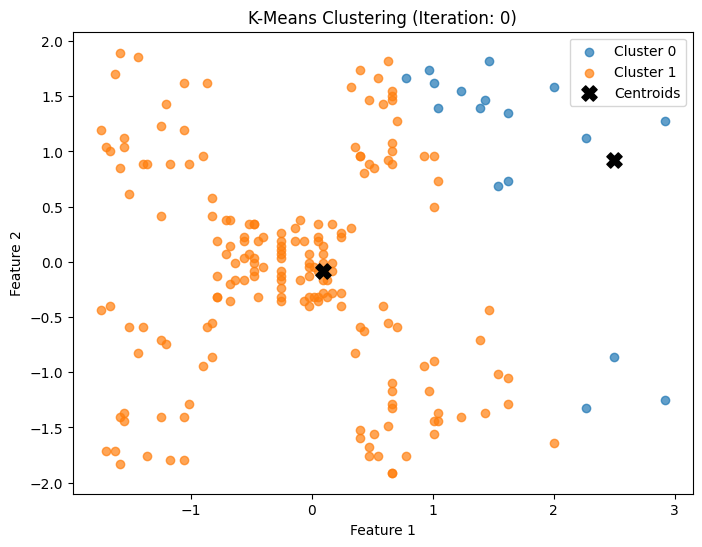

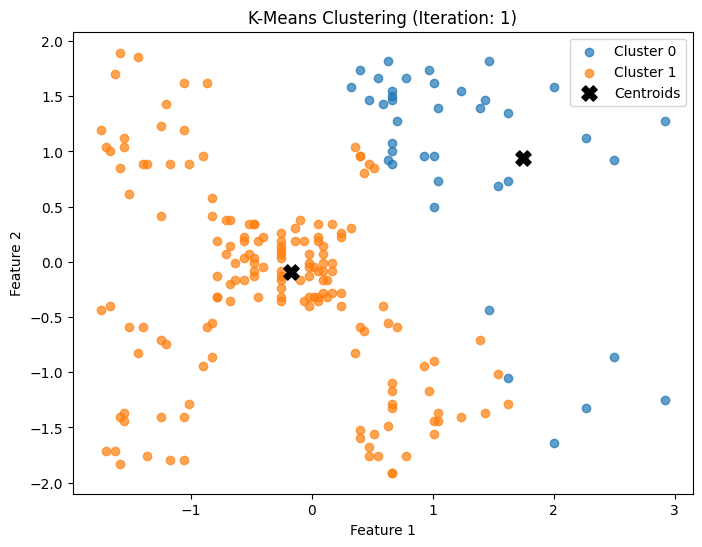

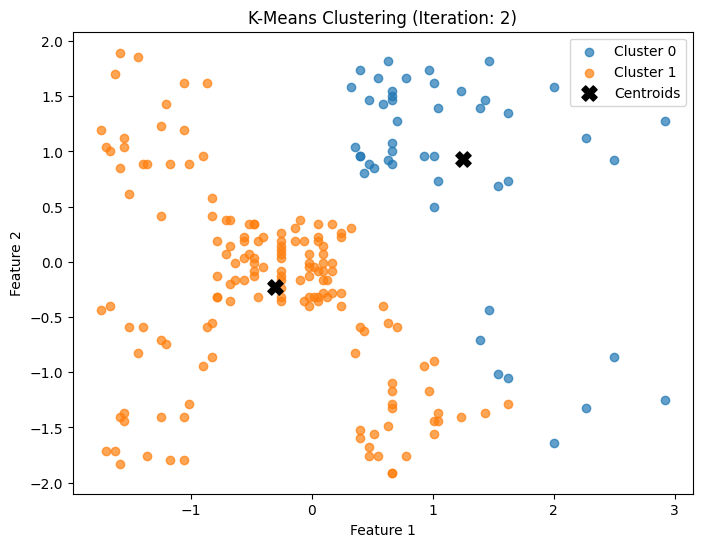

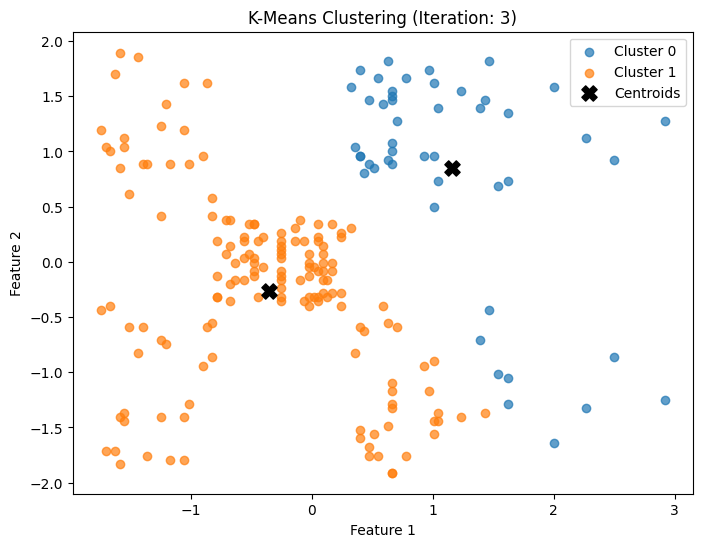

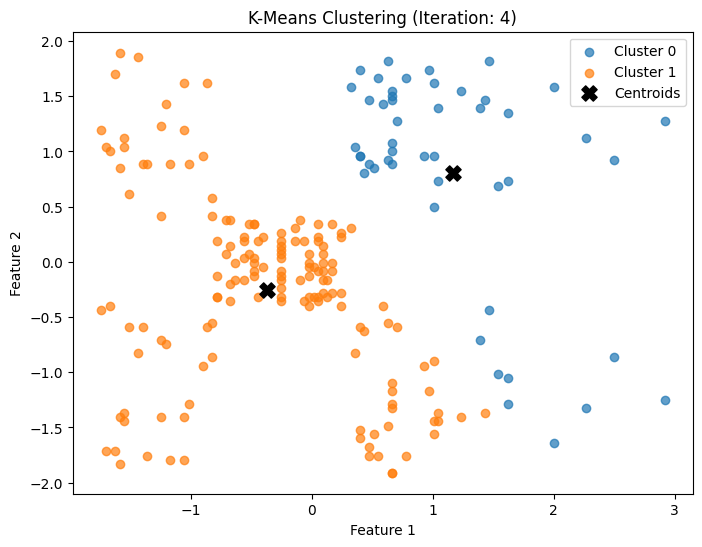

KMeans with Random converged in 5 iterations

### KMeans with KMeans++ Init - K=2 ###


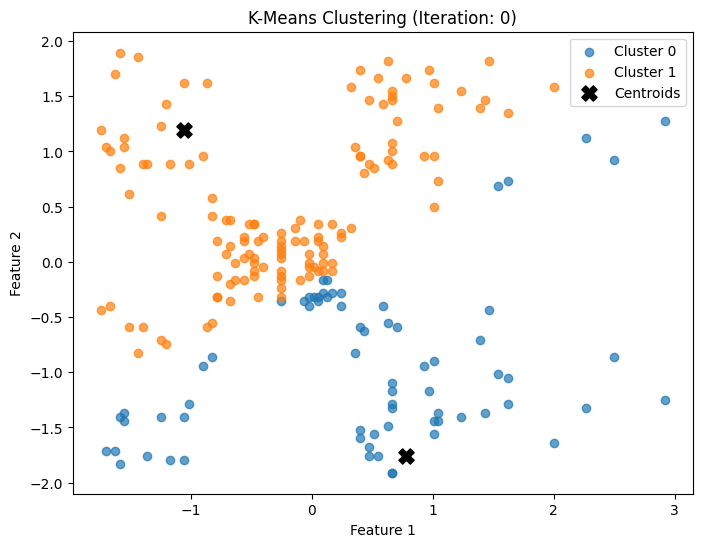

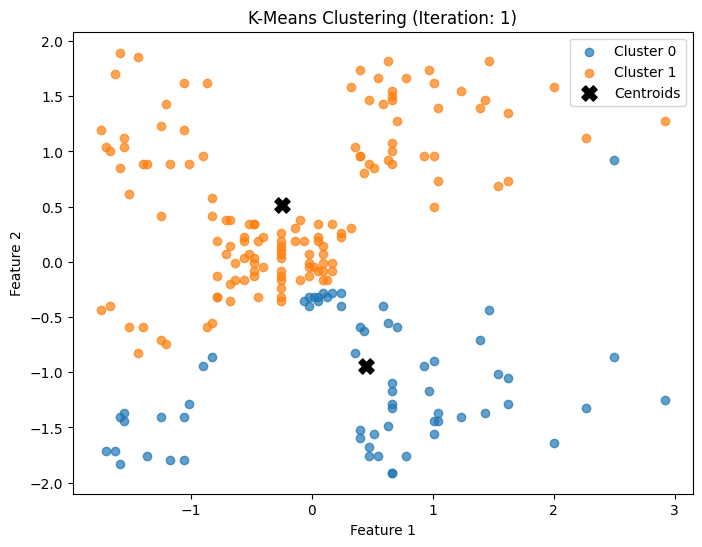

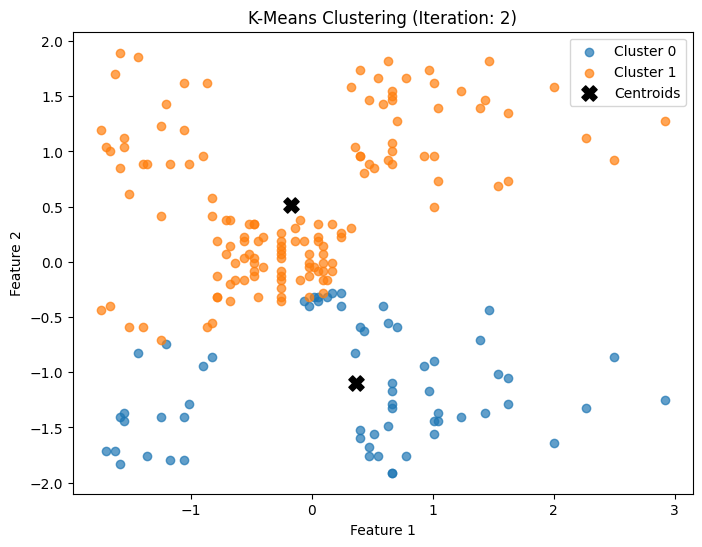

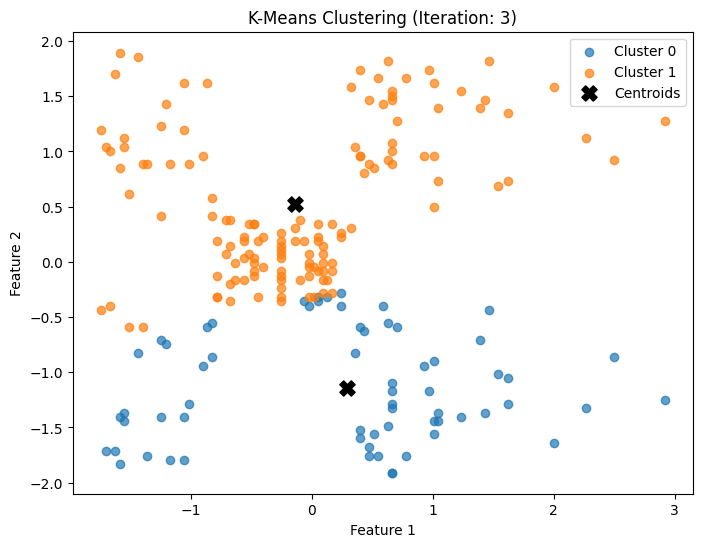

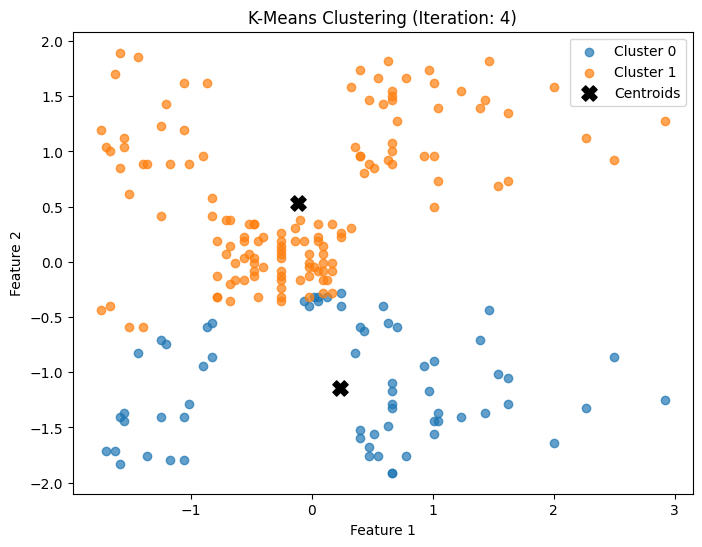

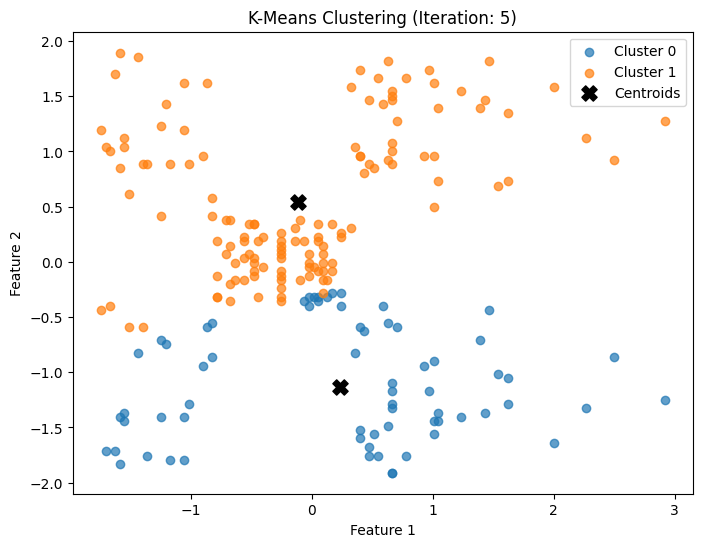

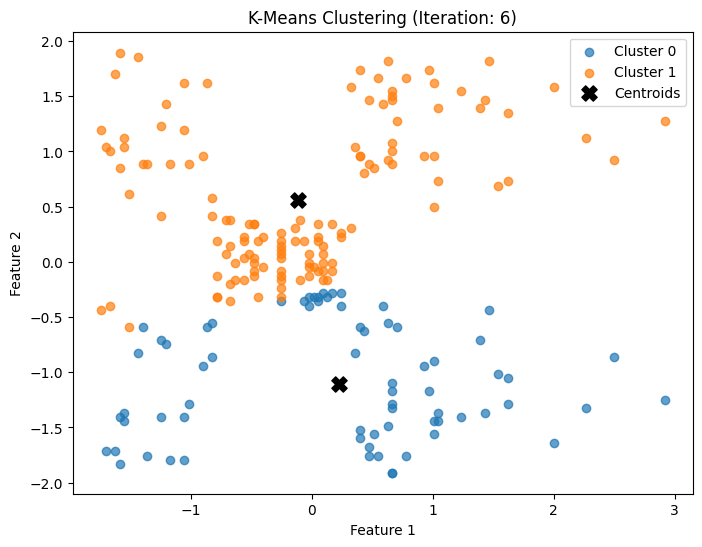

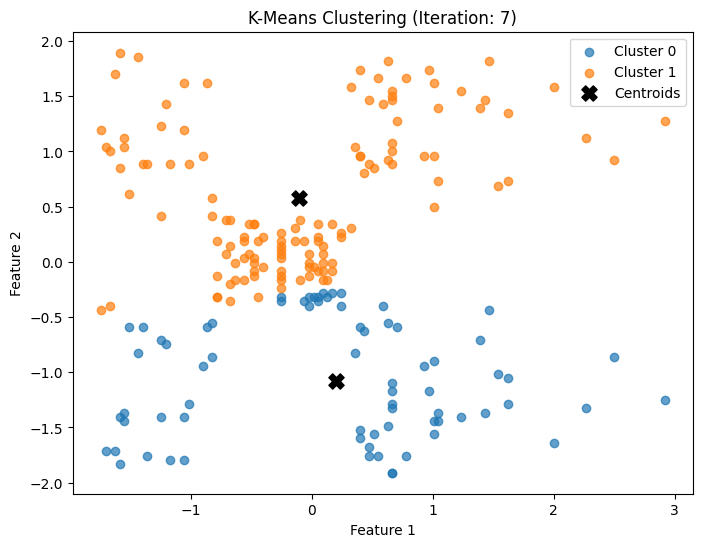

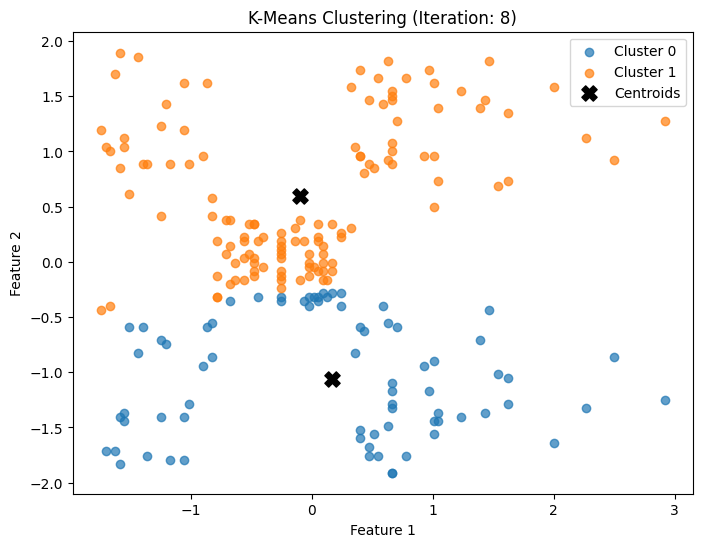

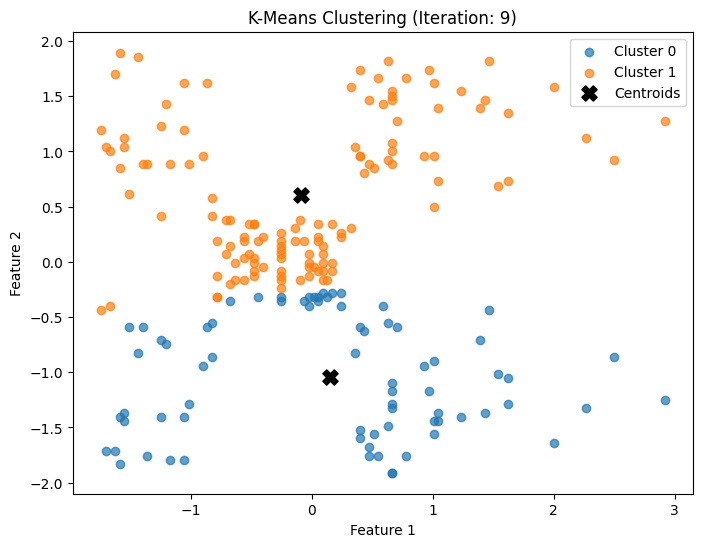

KMeans++ converged in 10 iterations

### KMeans with Farthest First Init - K=2 ###


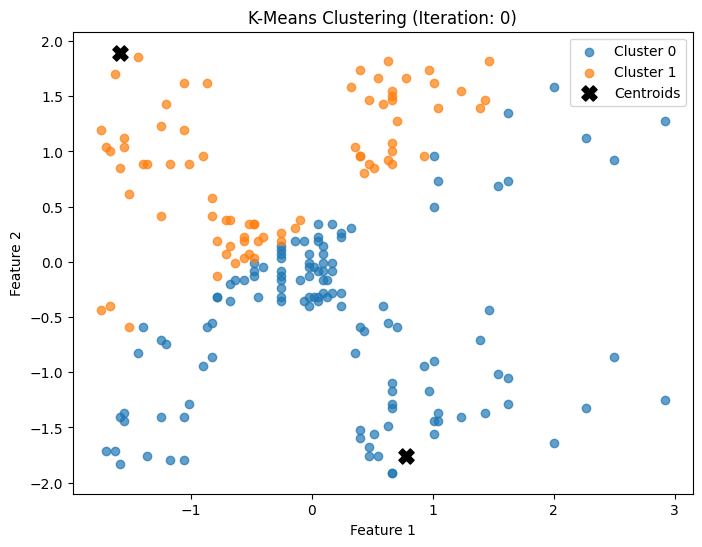

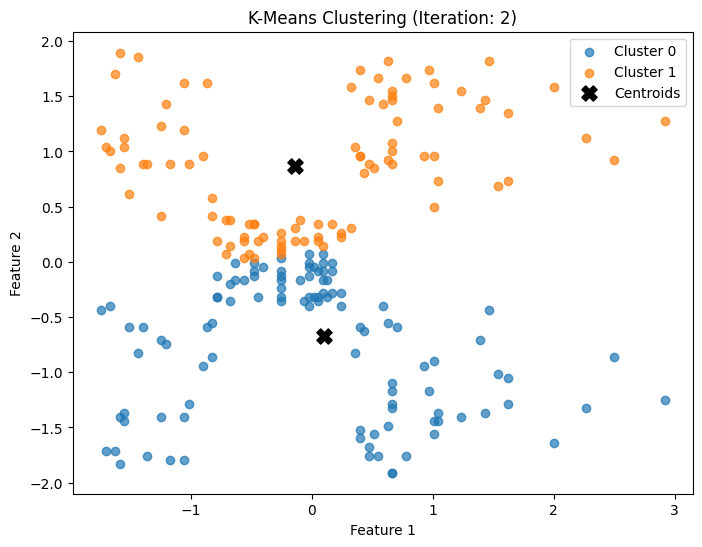

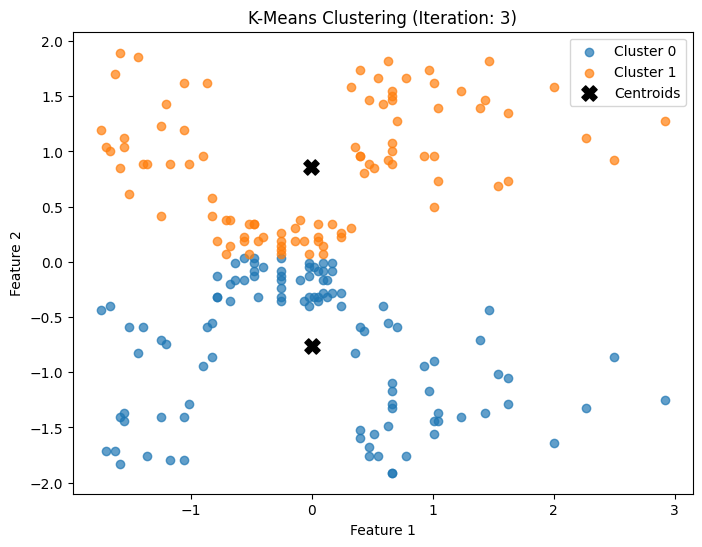

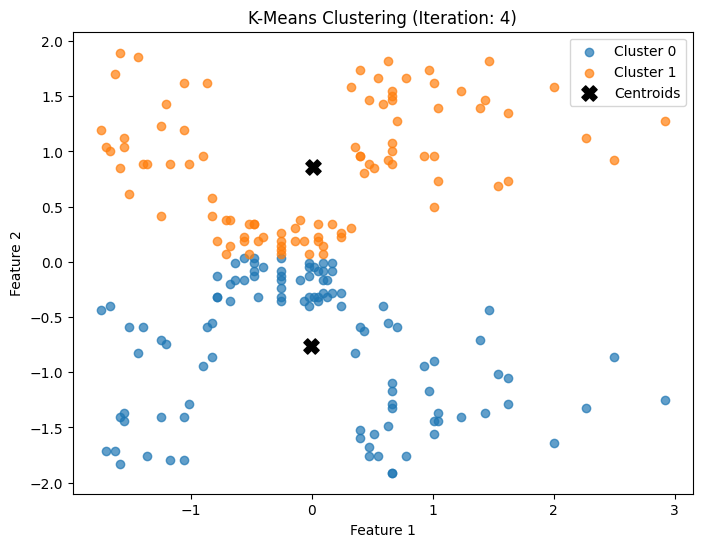

Farthest First converged in 5 iterations

### KMeans with Random Init - K=3 ###


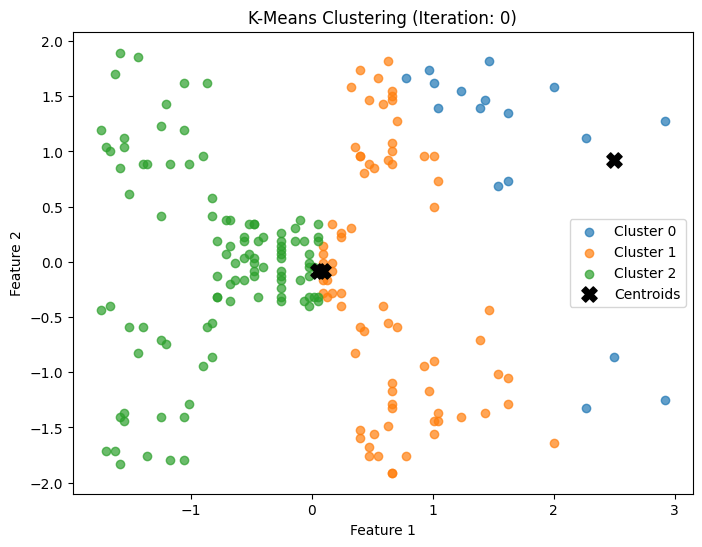

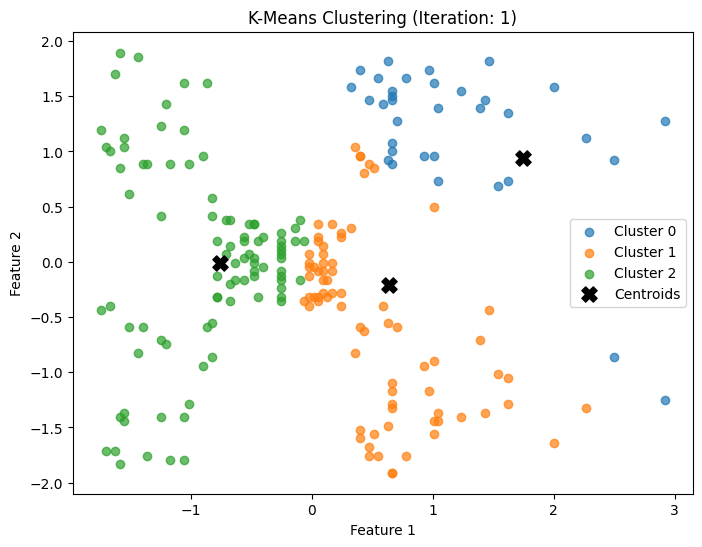

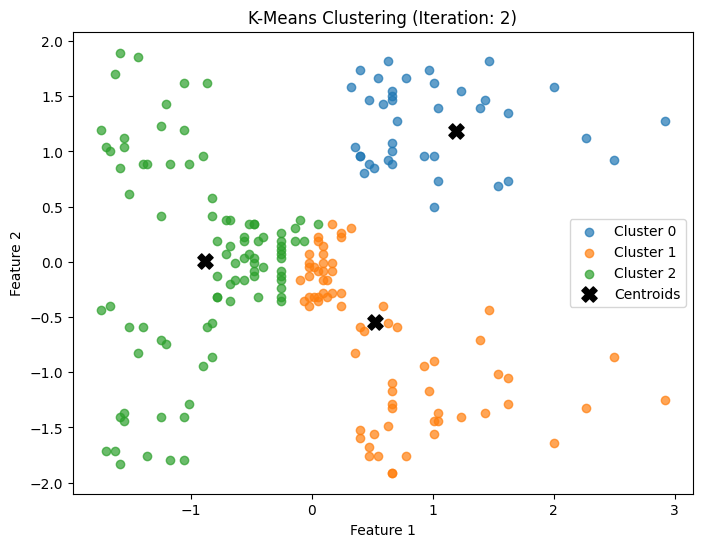

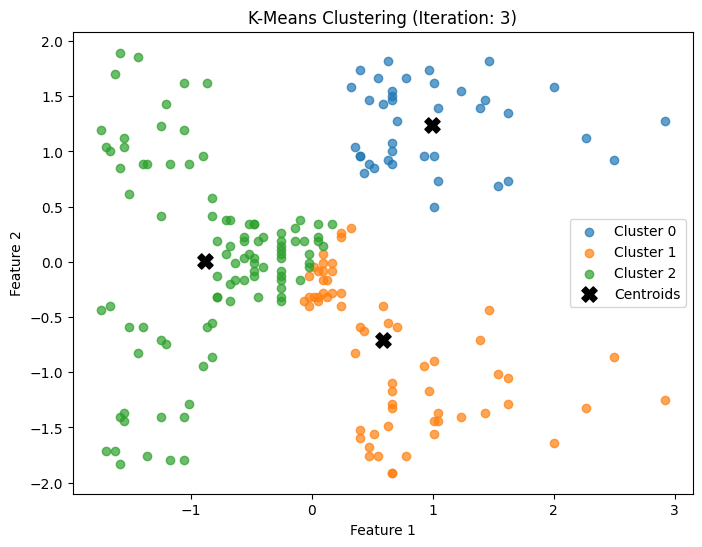

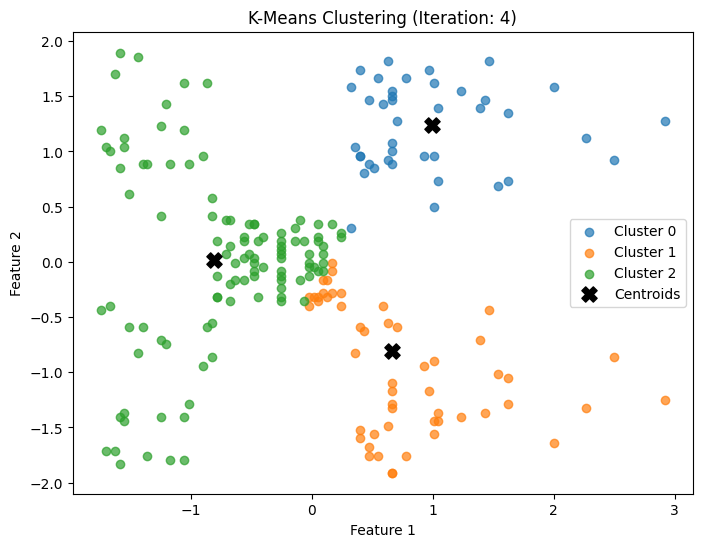

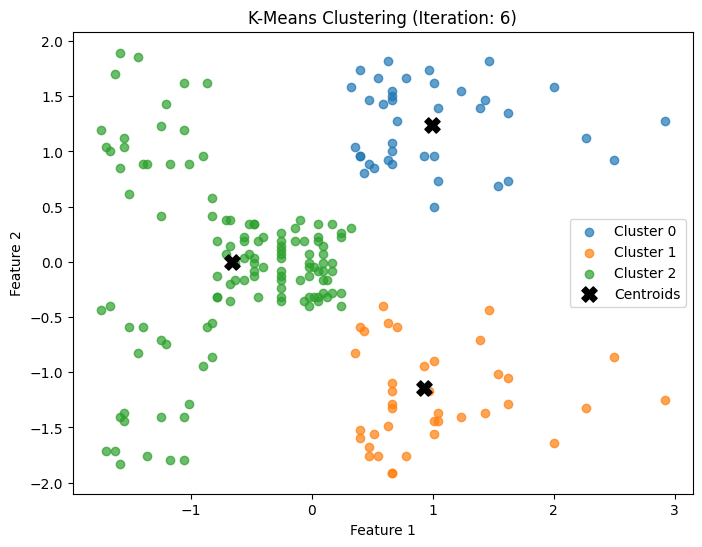

KMeans with Random converged in 8 iterations

### KMeans with KMeans++ Init - K=3 ###


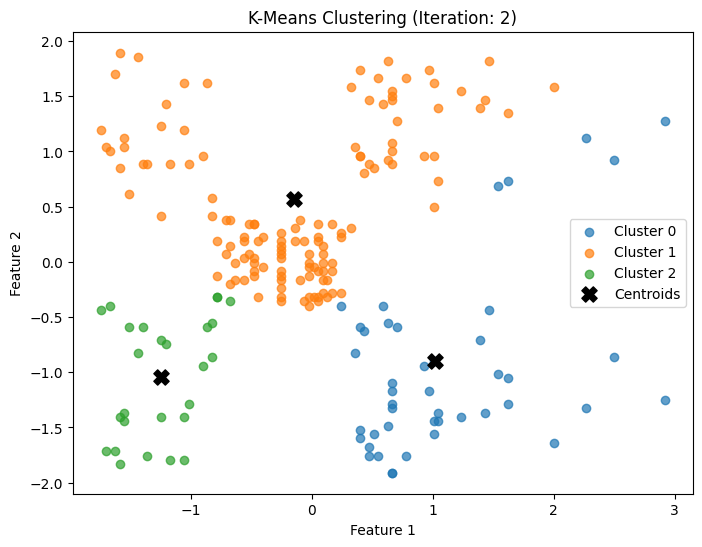

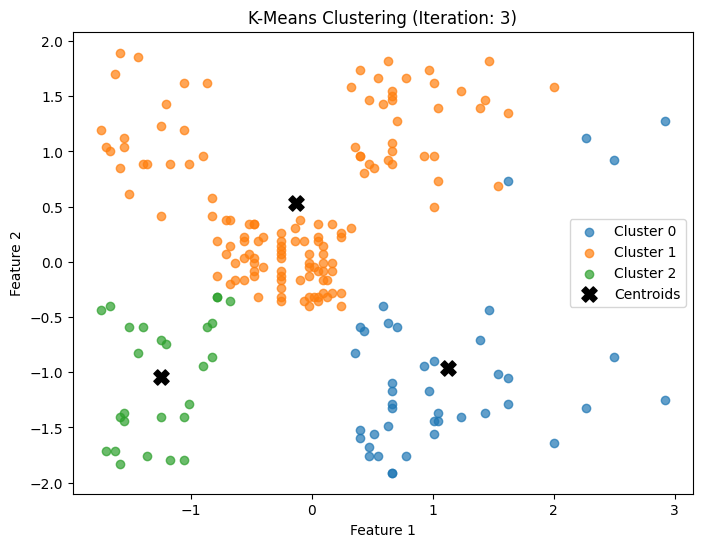

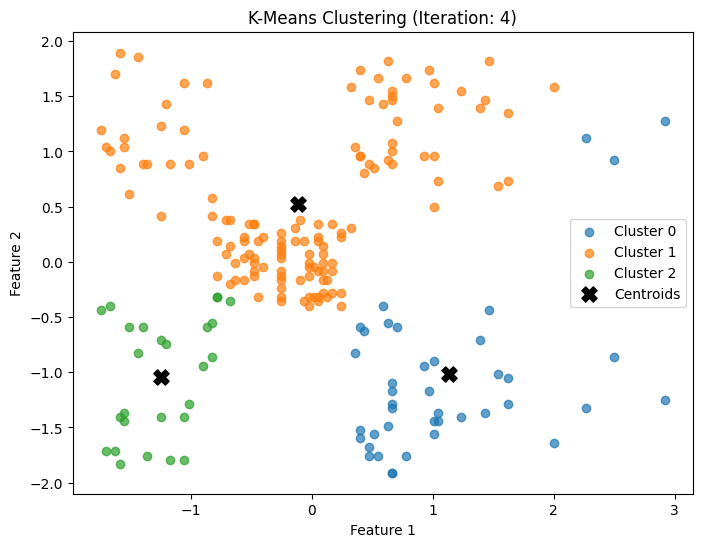

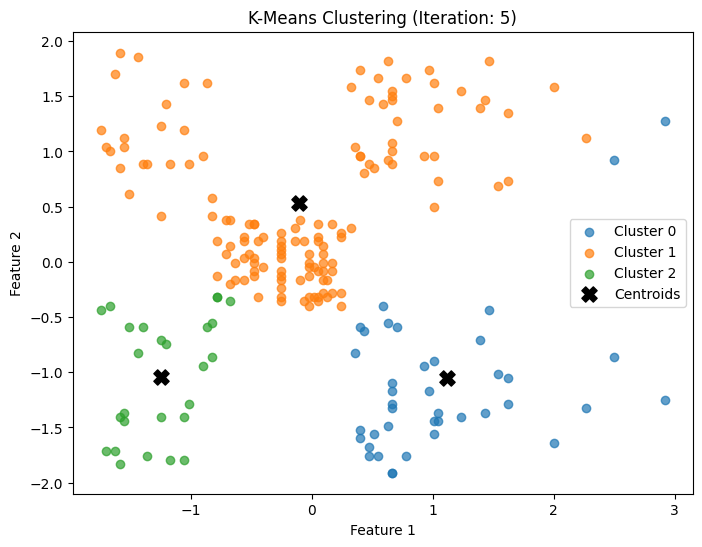

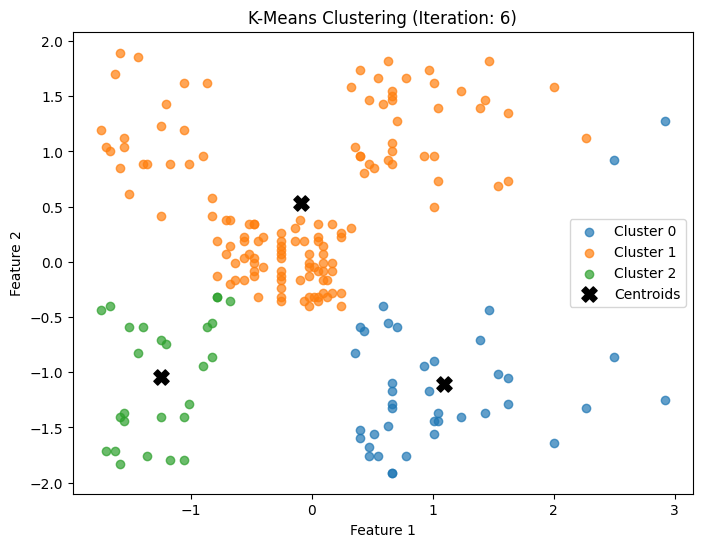

KMeans++ converged in 7 iterations

### KMeans with Farthest First Init - K=3 ###


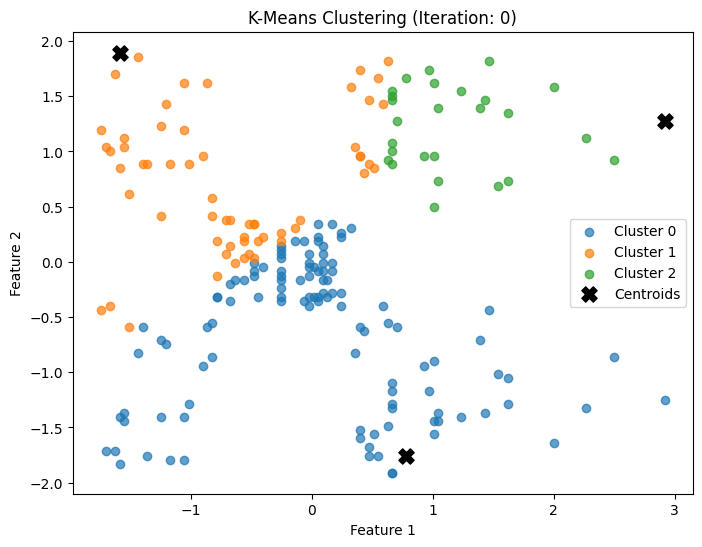

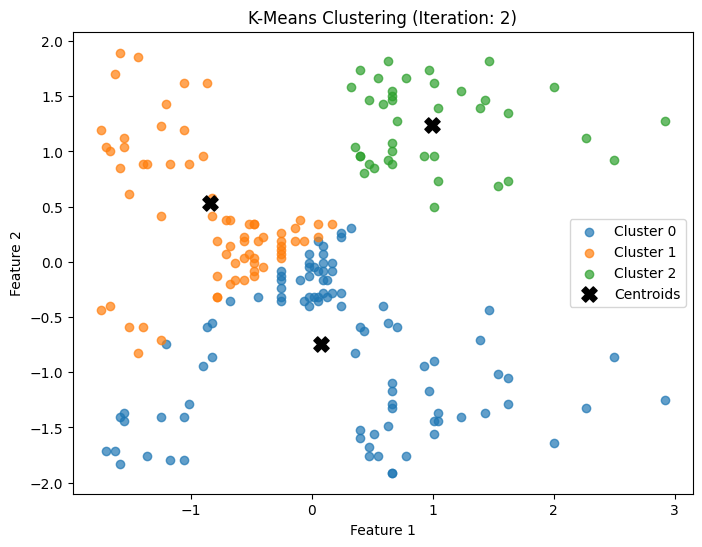

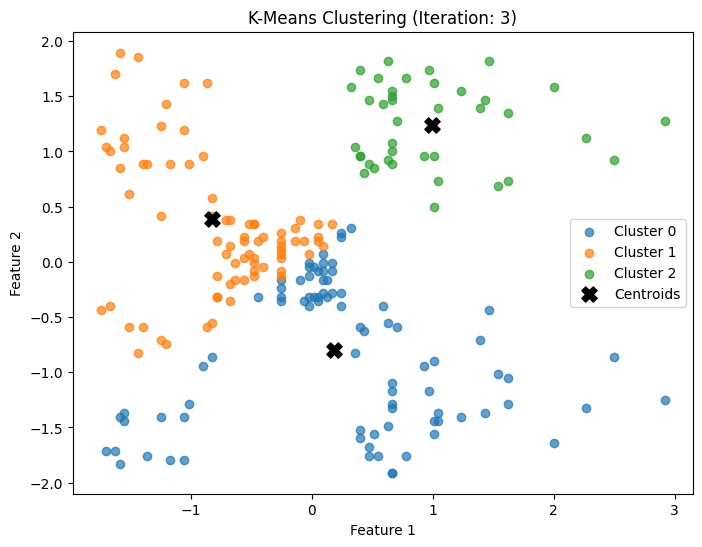

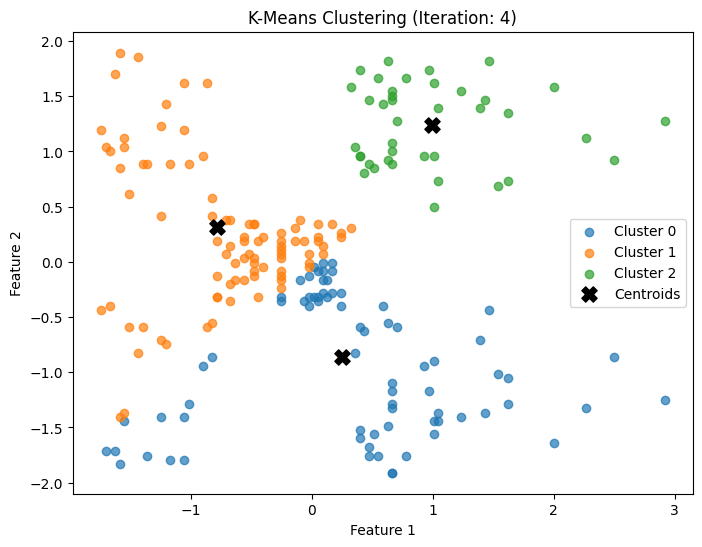

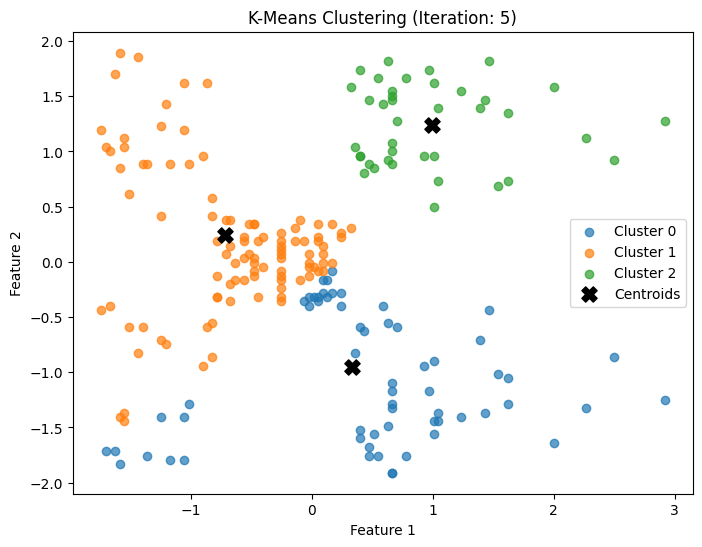

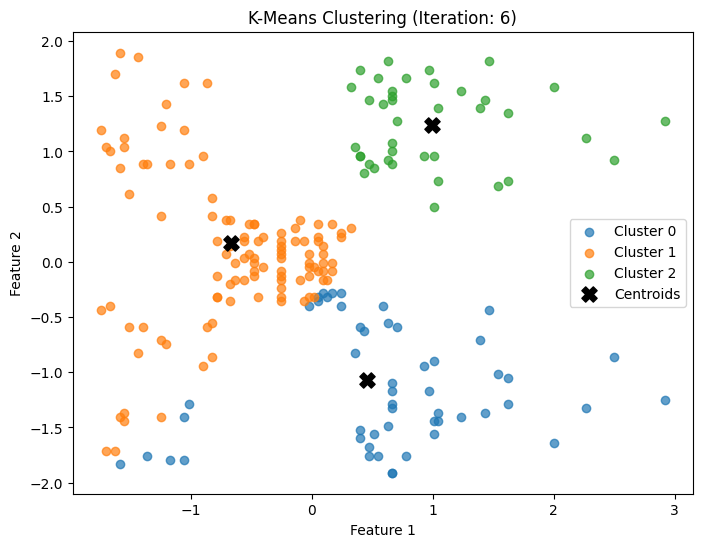

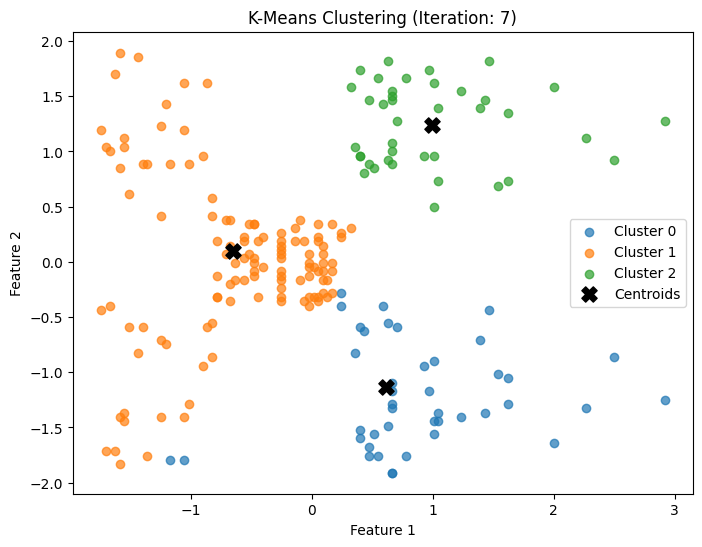

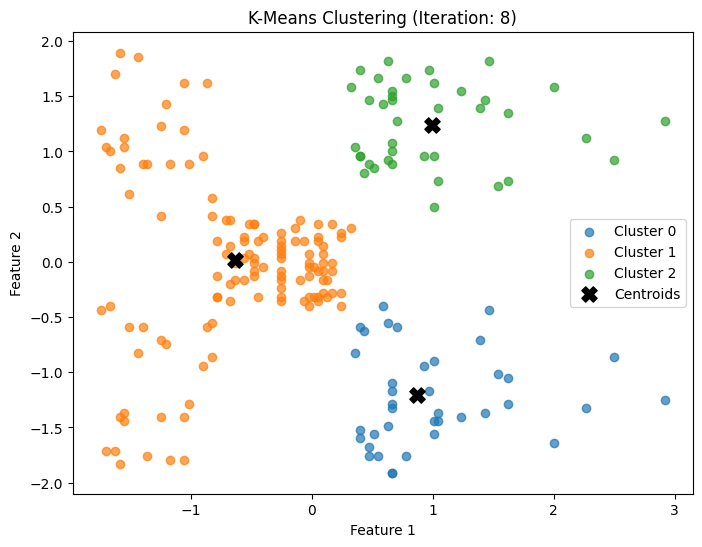

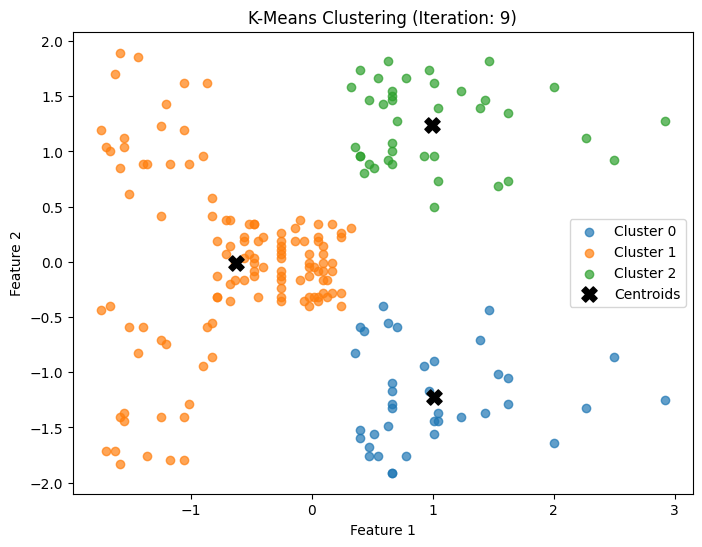

Farthest First converged in 10 iterations

### KMeans with Random Init - K=4 ###


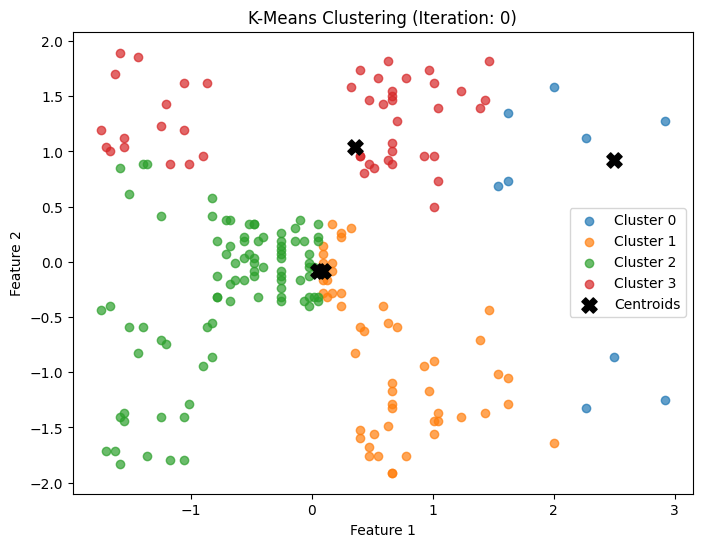

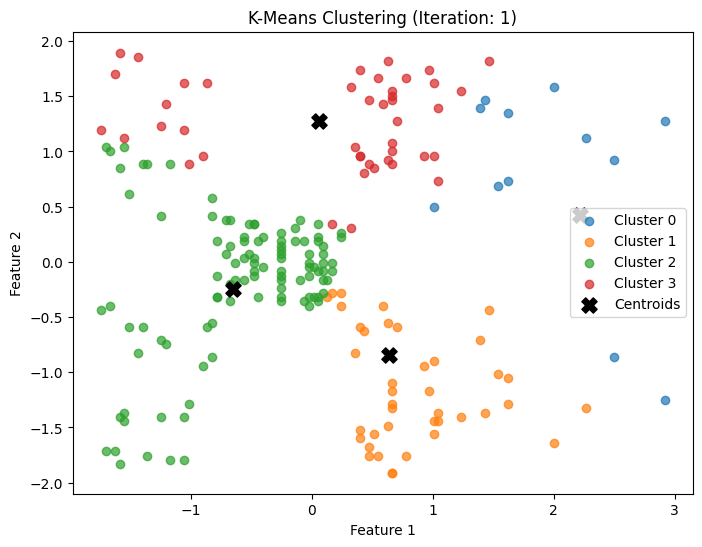

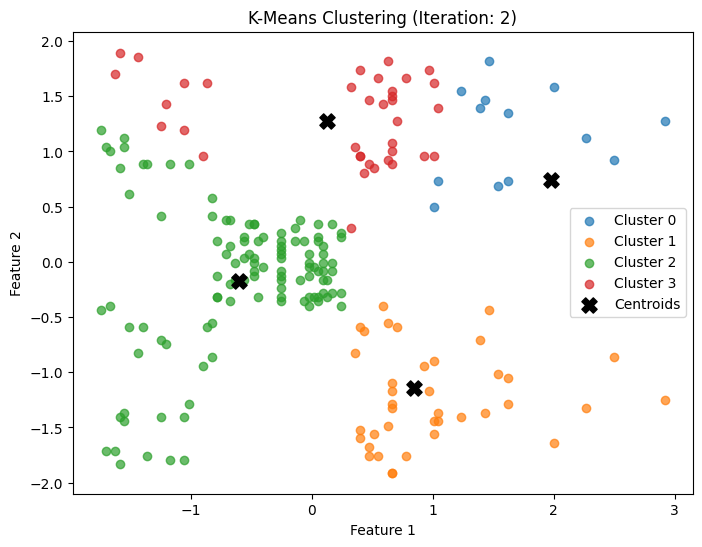

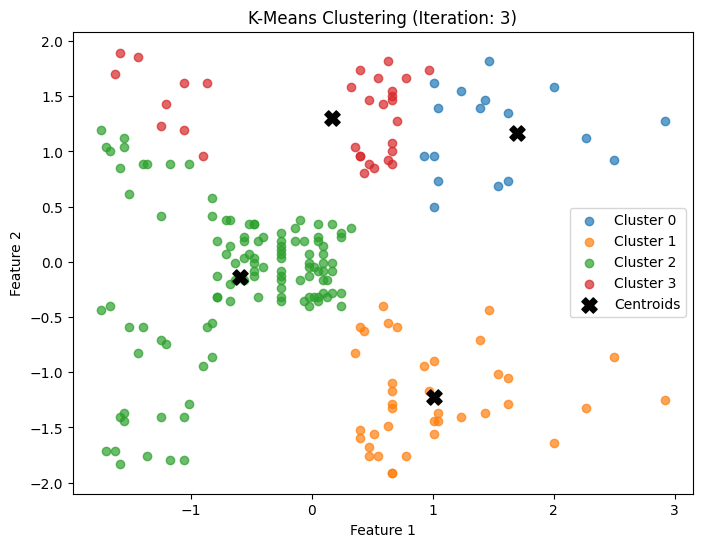

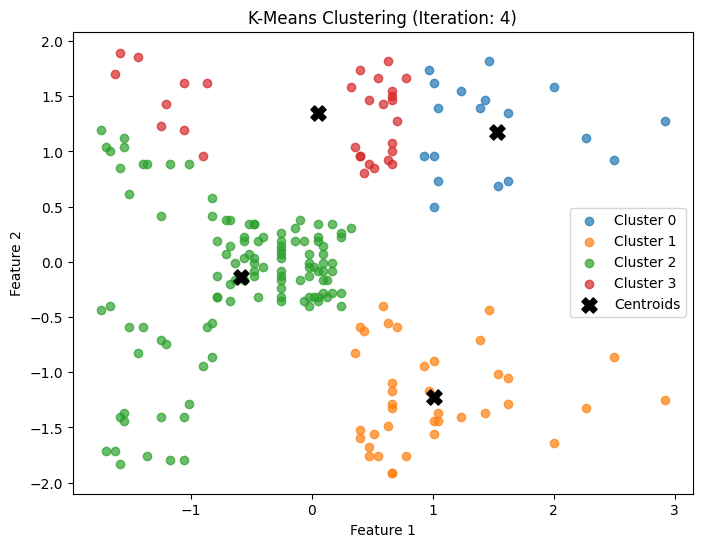

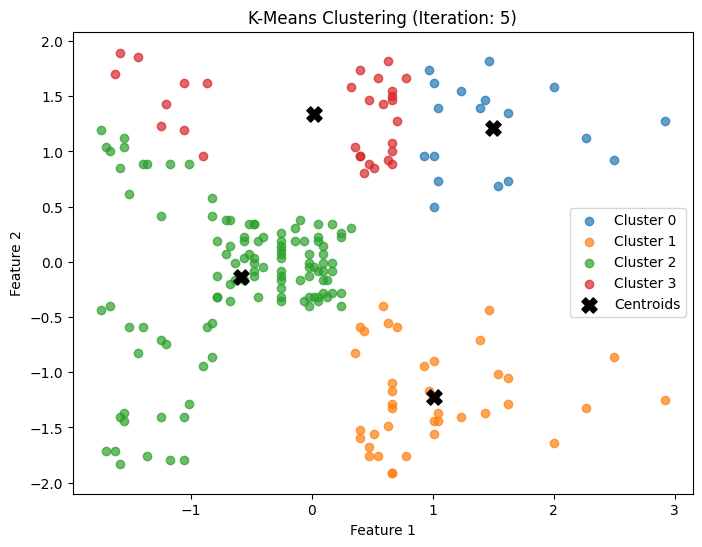

KMeans with Random converged in 6 iterations

### KMeans with KMeans++ Init - K=4 ###


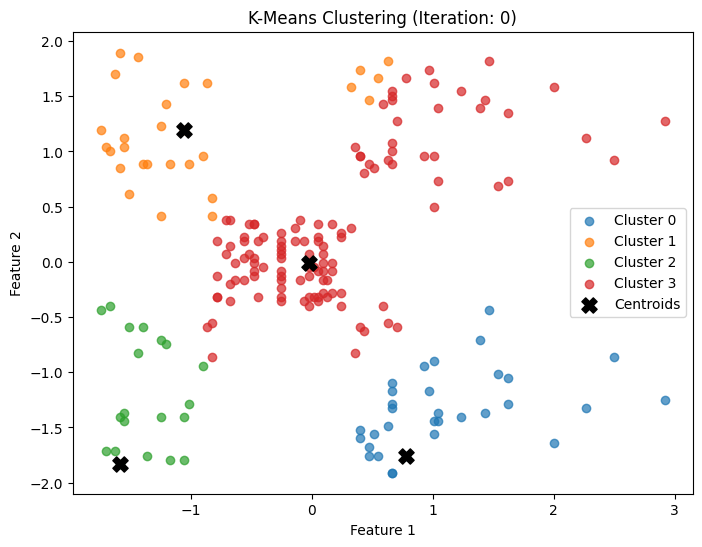

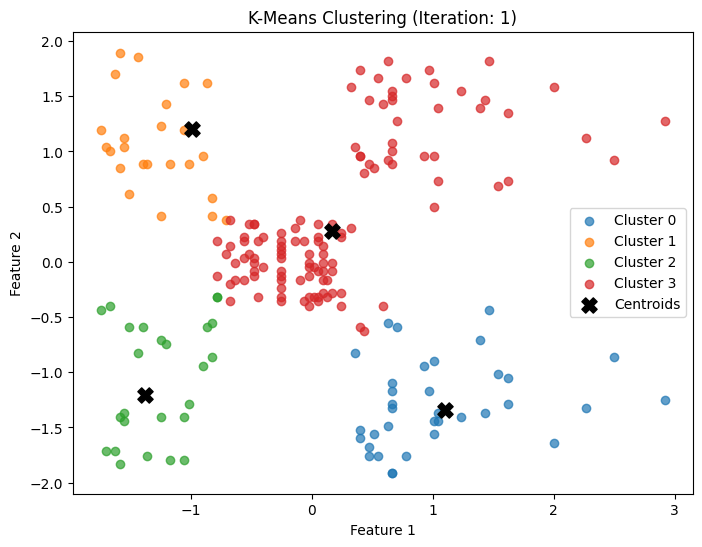

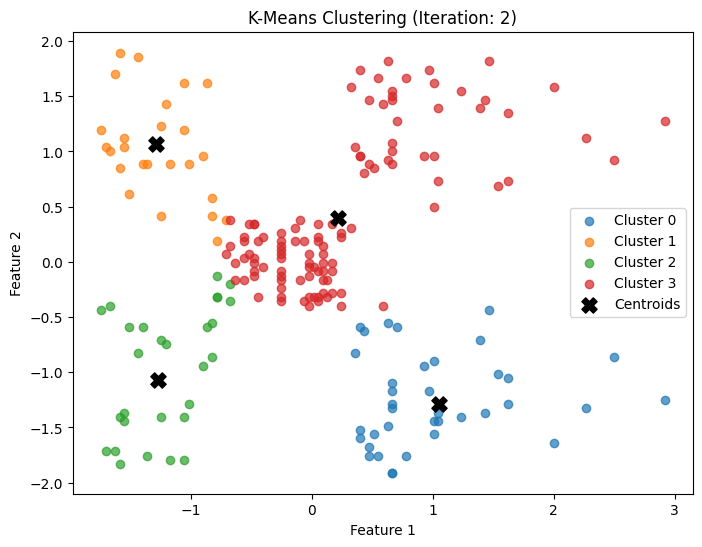

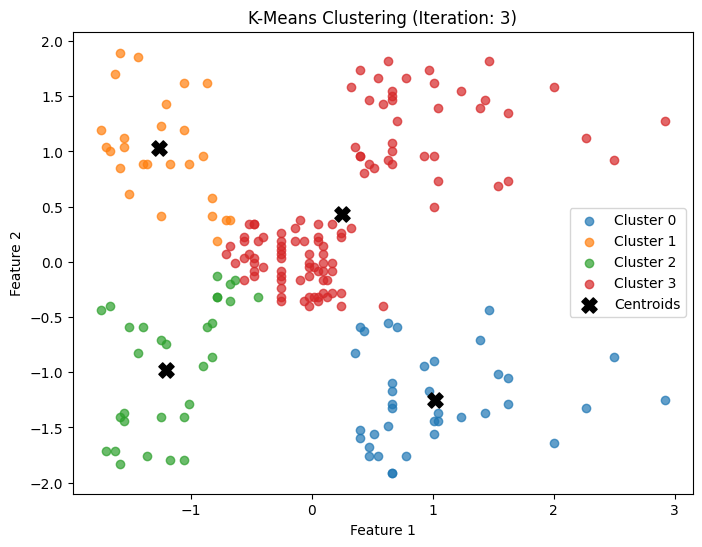

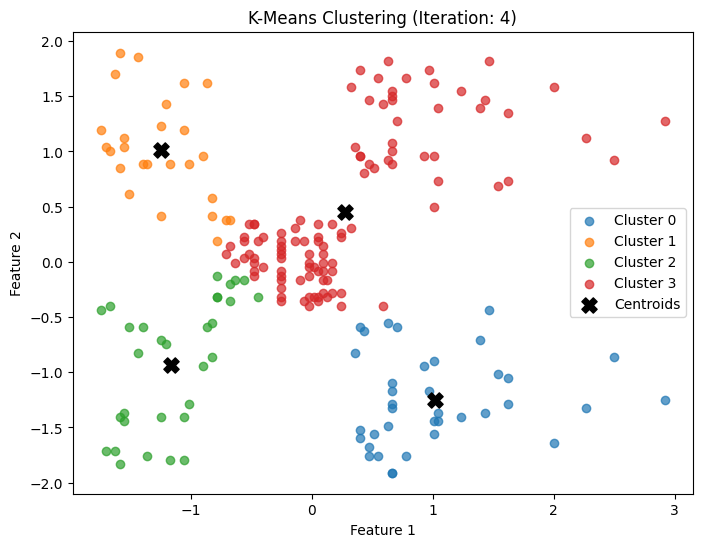

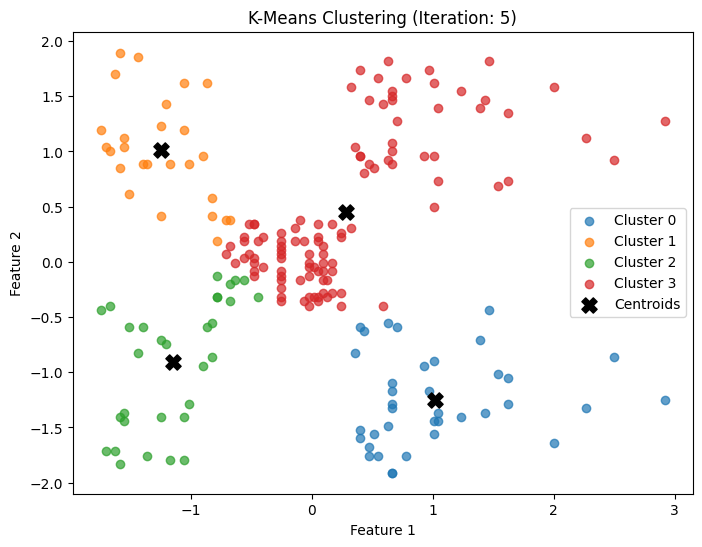

KMeans++ converged in 6 iterations

### KMeans with Farthest First Init - K=4 ###


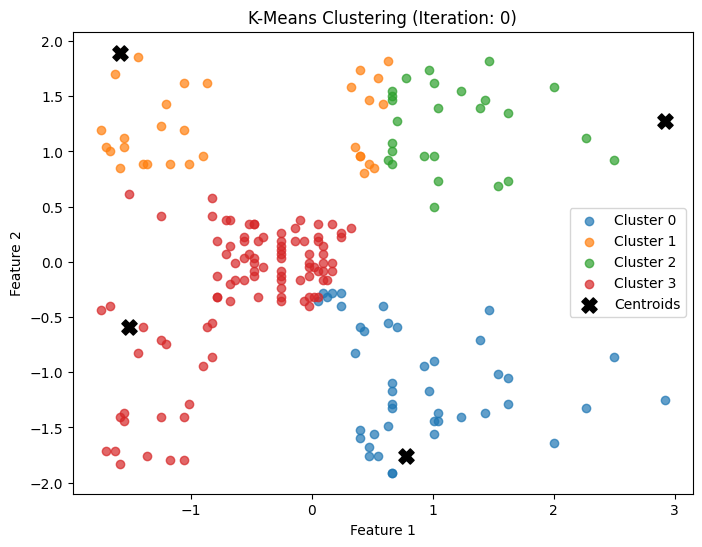

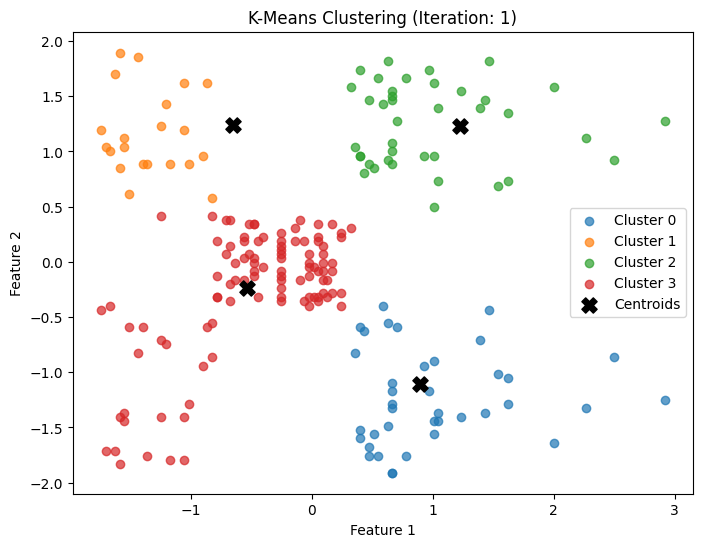

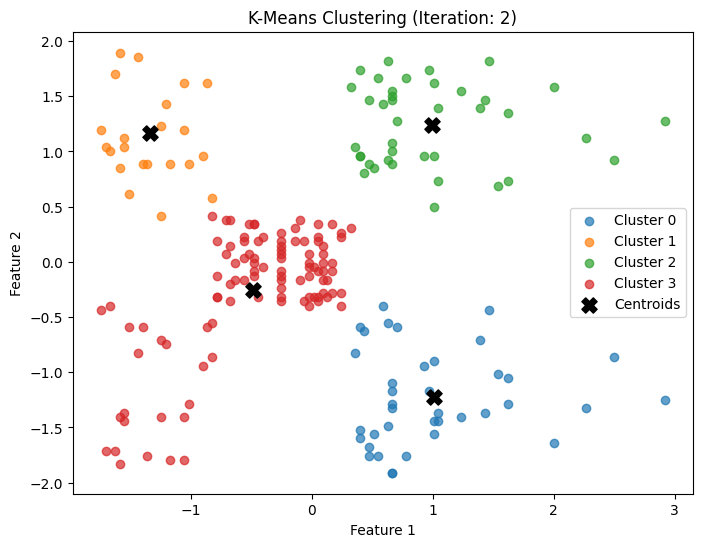

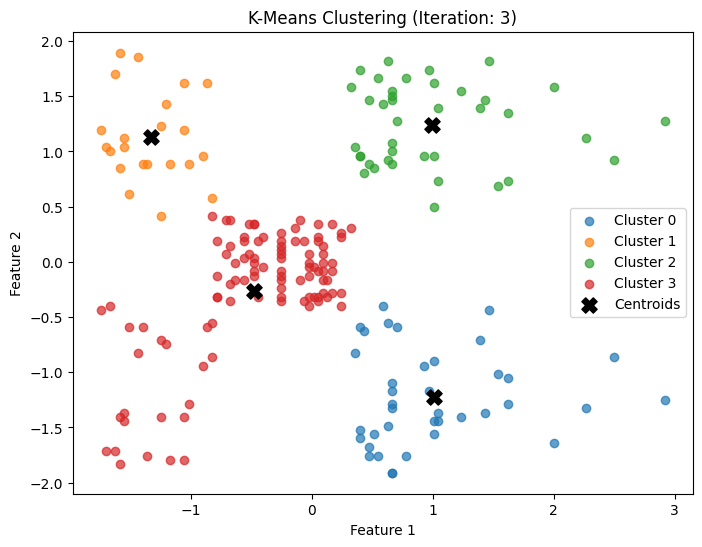

Farthest First converged in 4 iterations

### KMeans with Random Init - K=5 ###


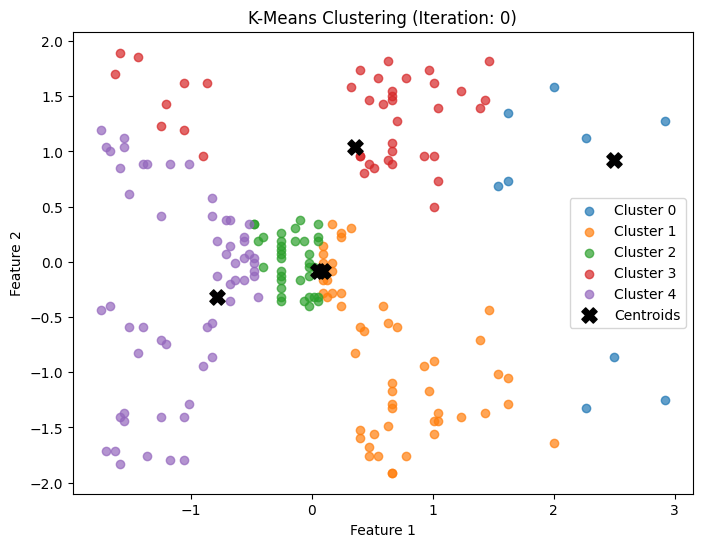

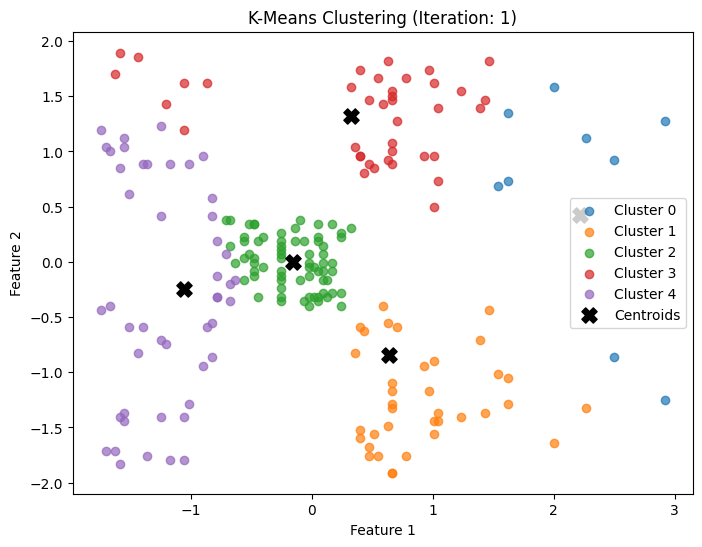

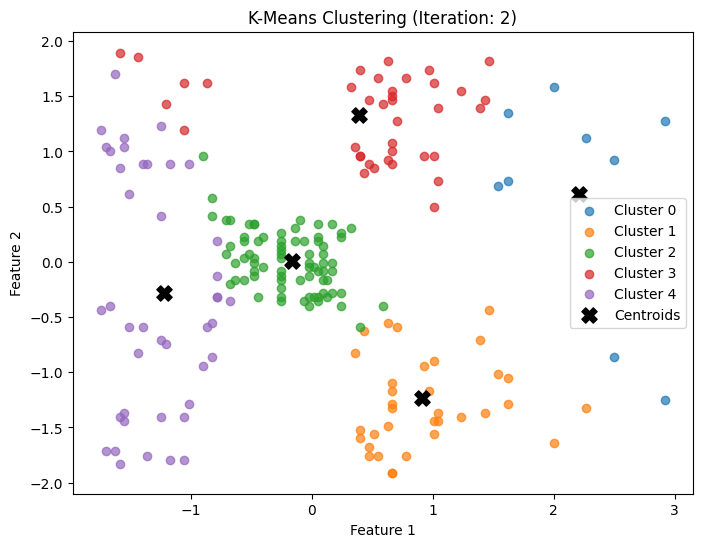

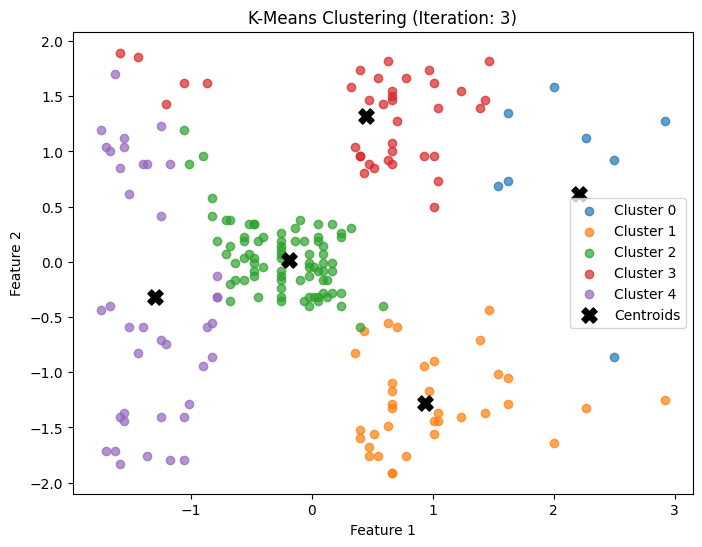

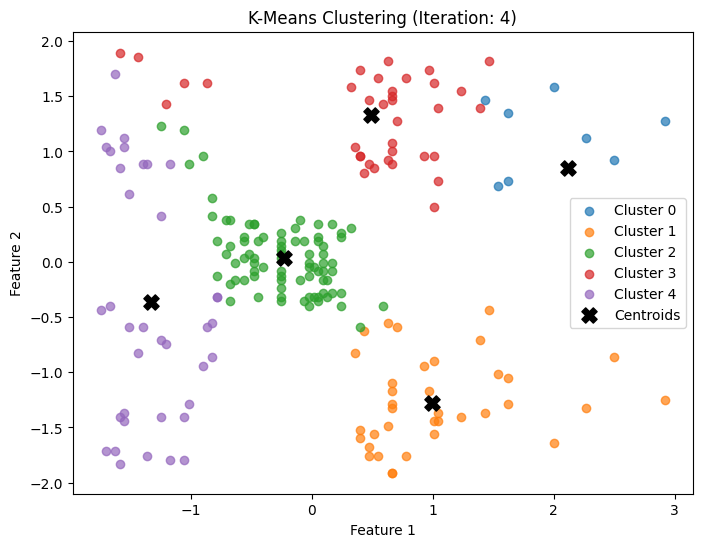

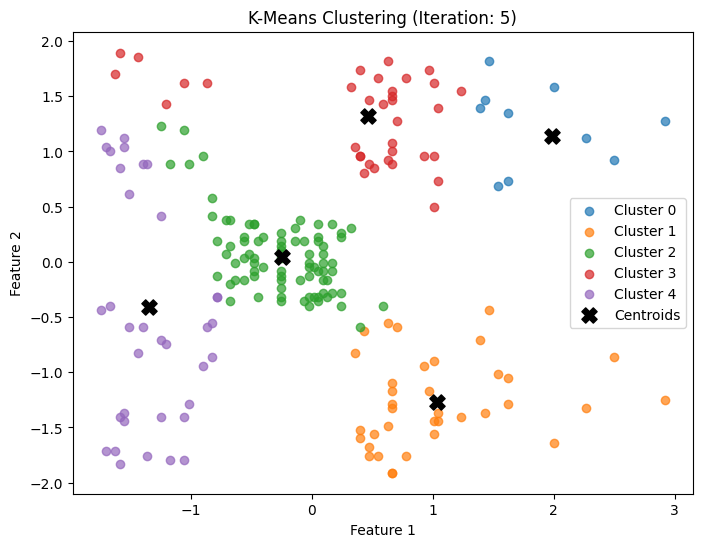

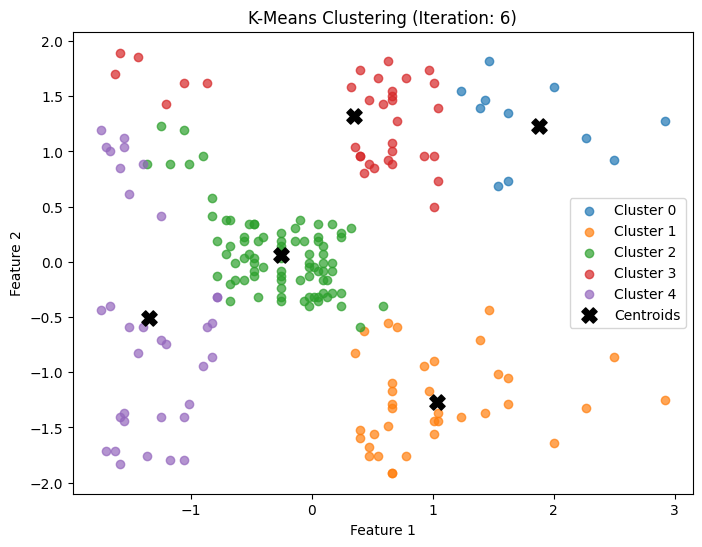

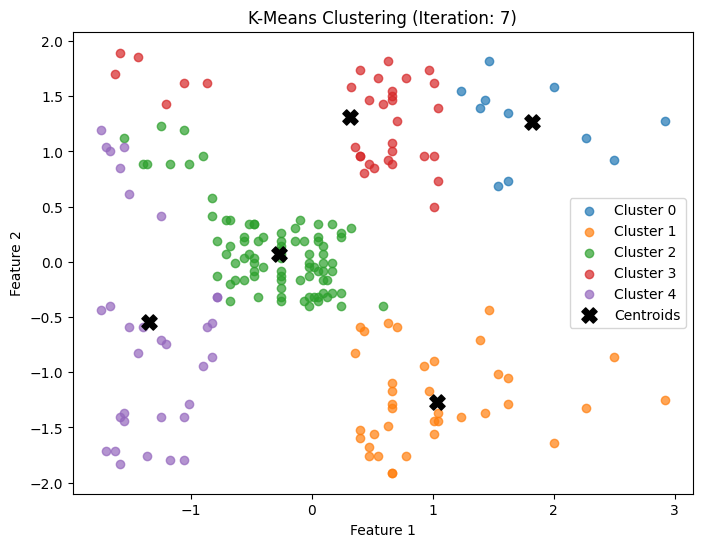

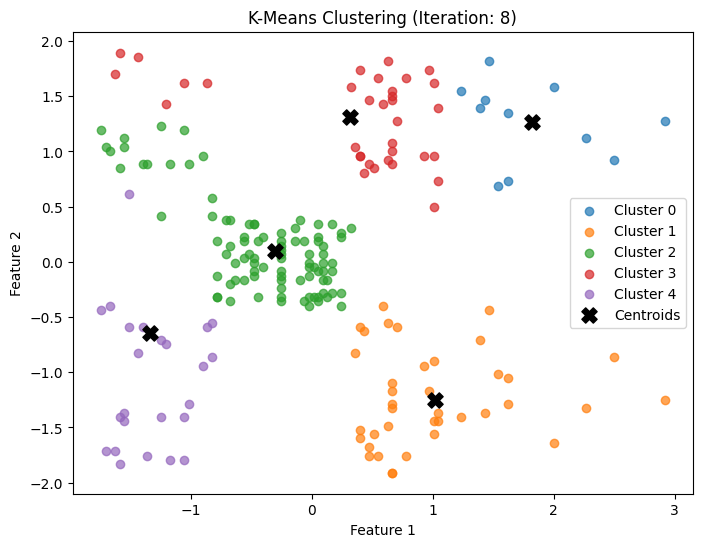

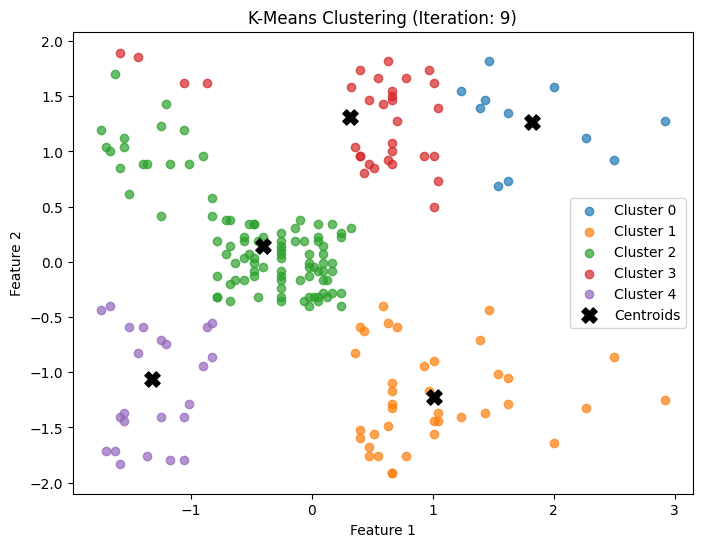

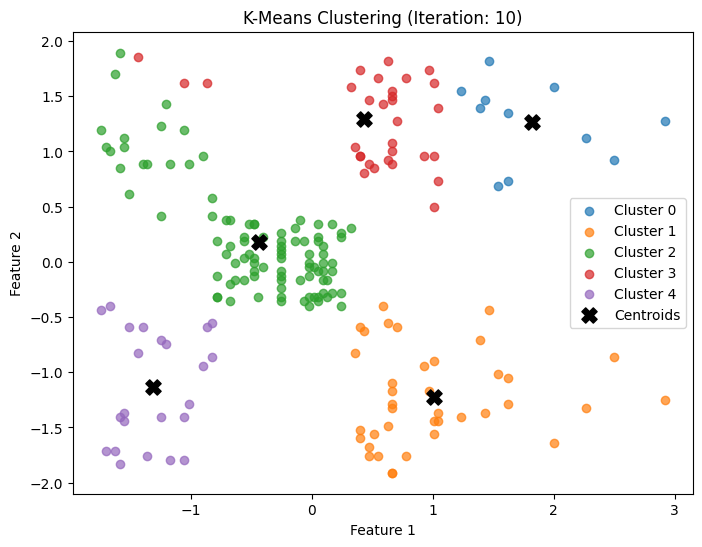

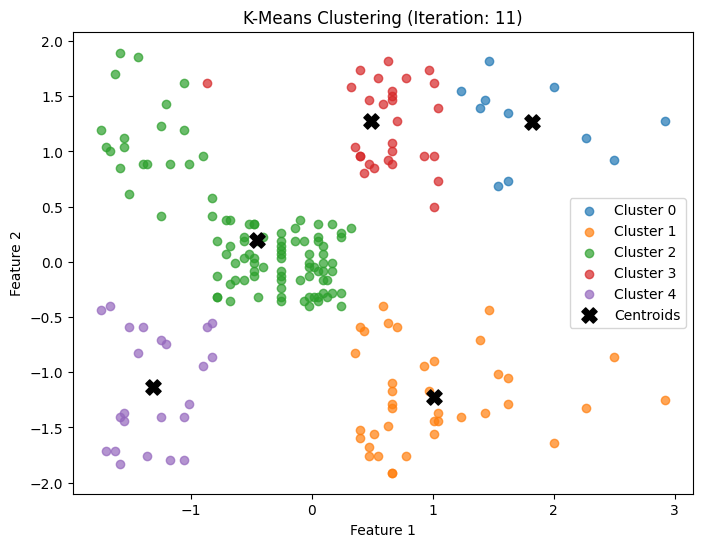

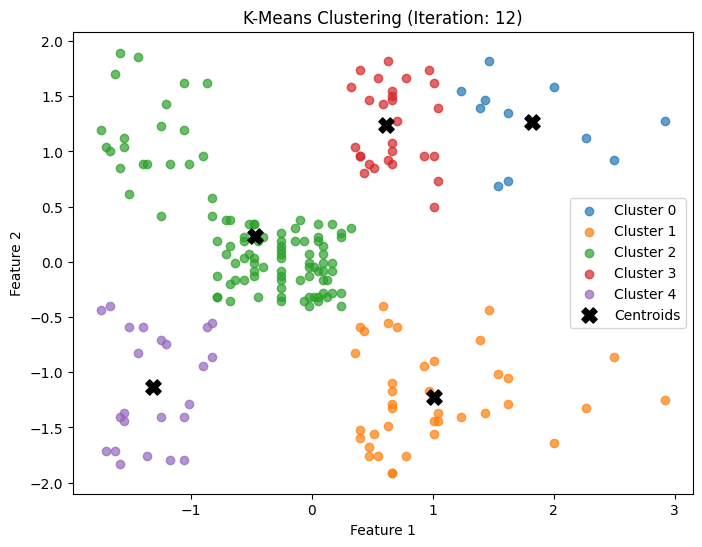

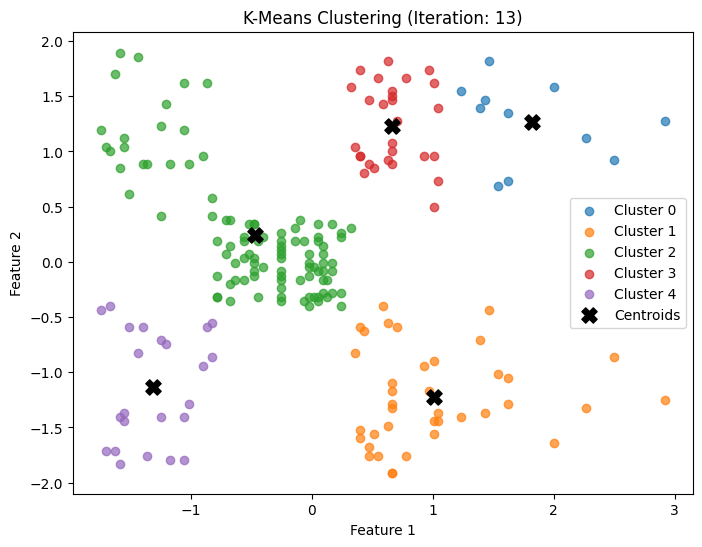

KMeans with Random converged in 14 iterations

### KMeans with KMeans++ Init - K=5 ###


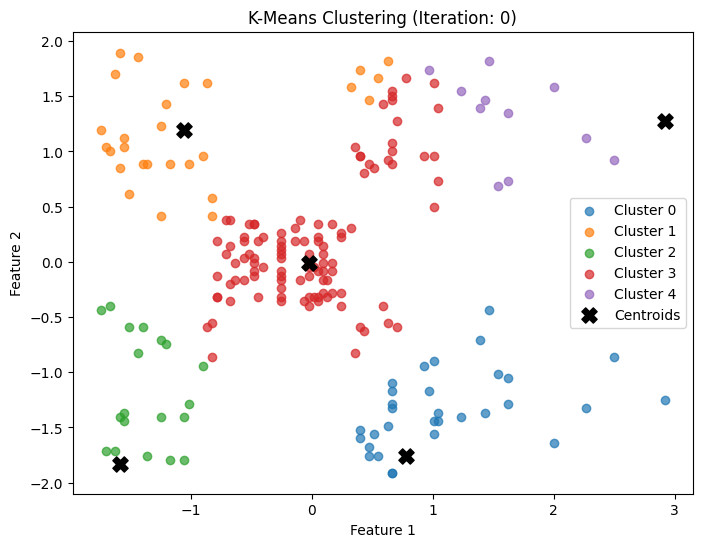

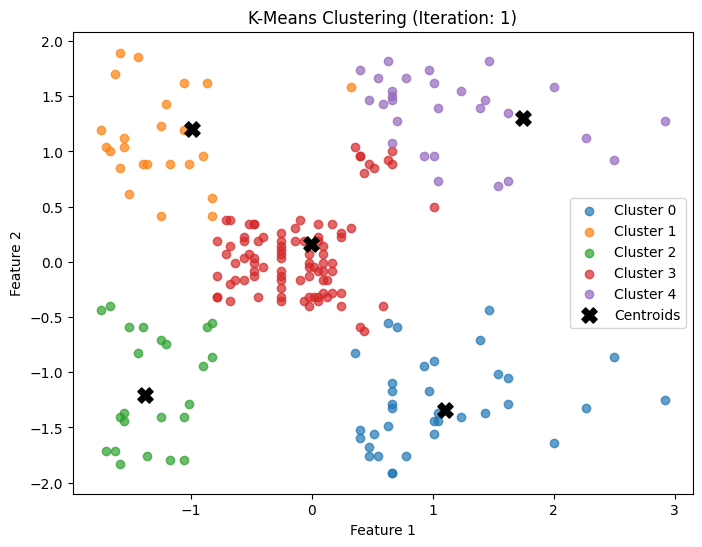

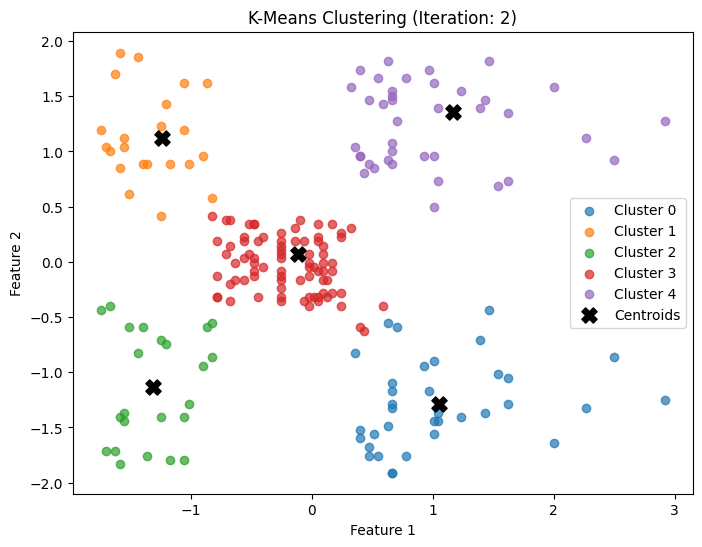

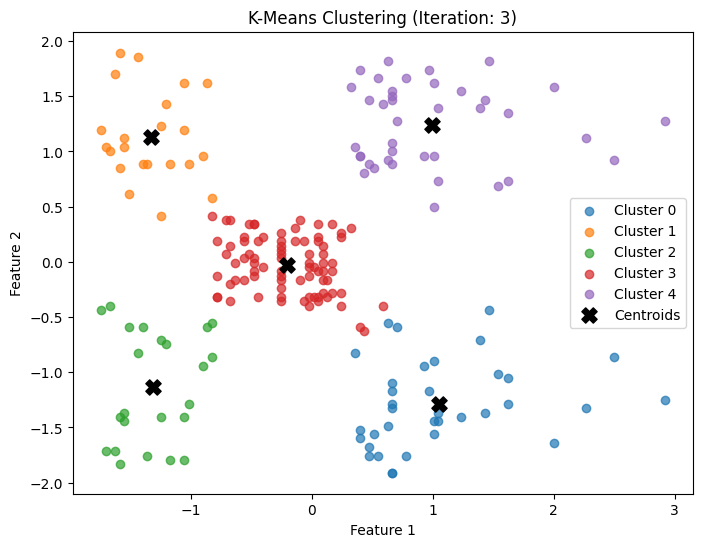

KMeans++ converged in 4 iterations

### KMeans with Farthest First Init - K=5 ###


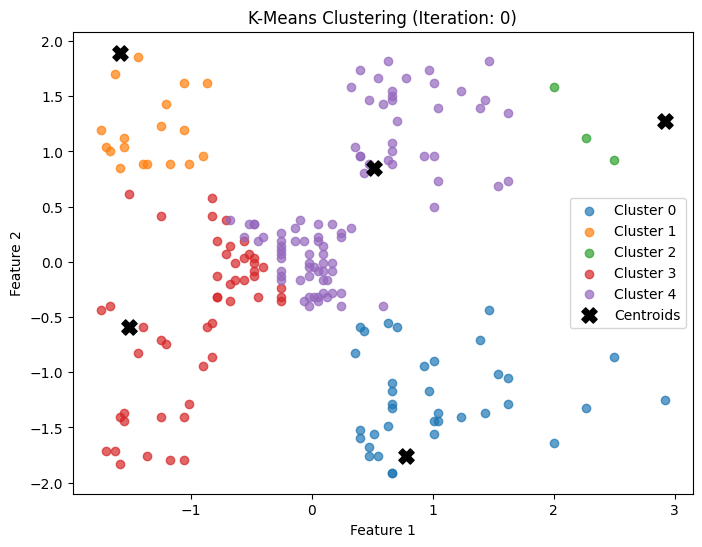

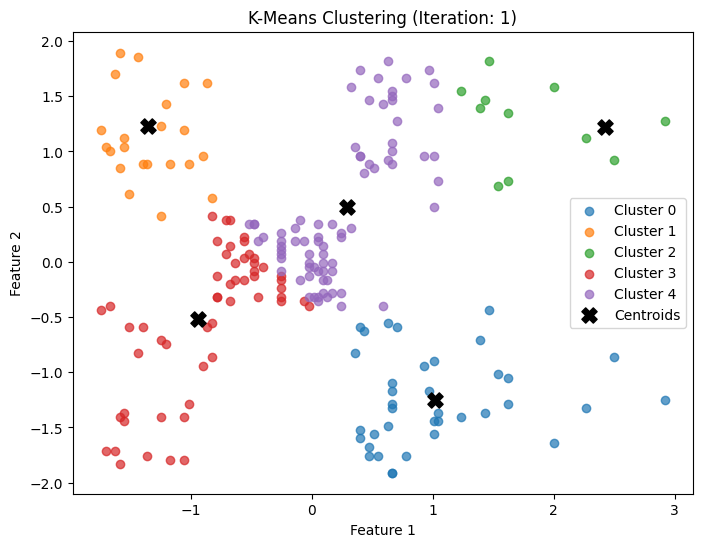

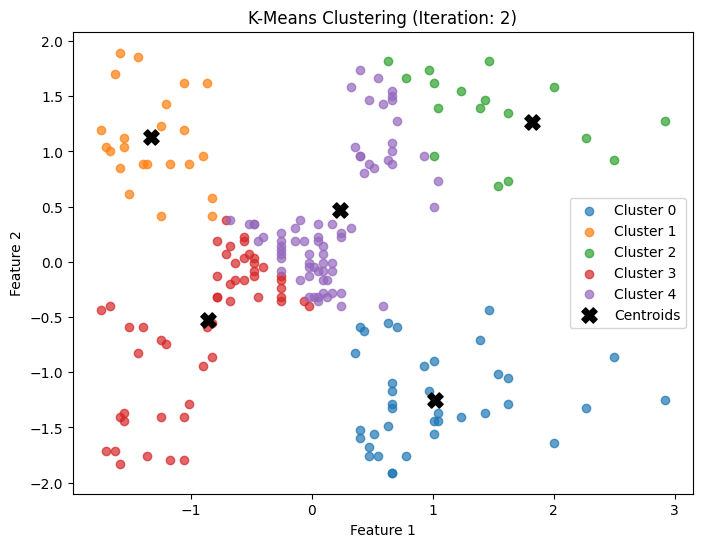

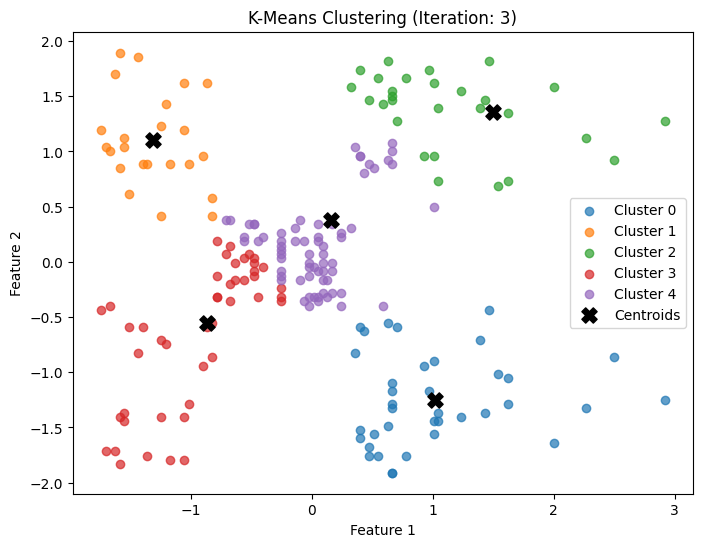

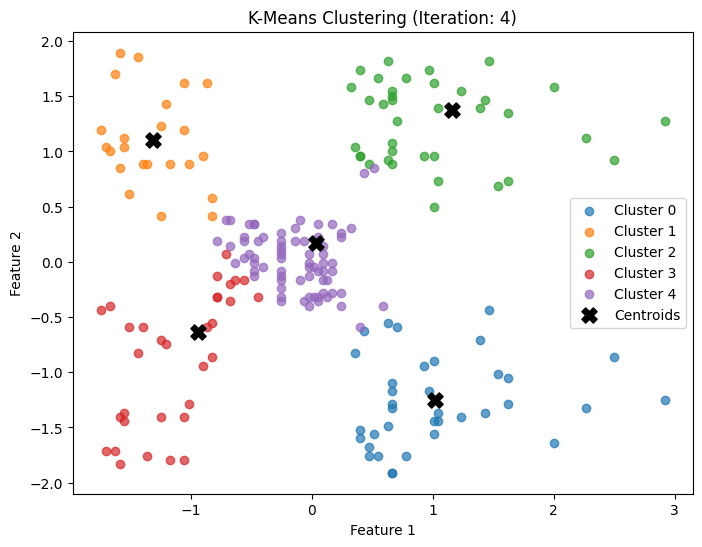

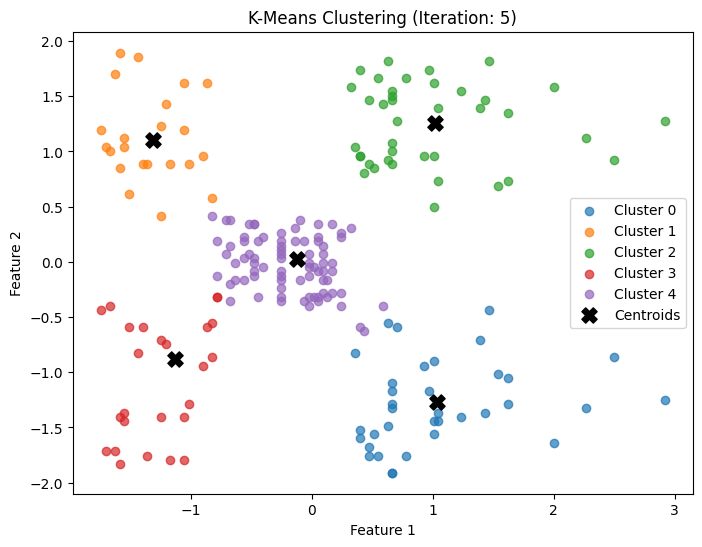

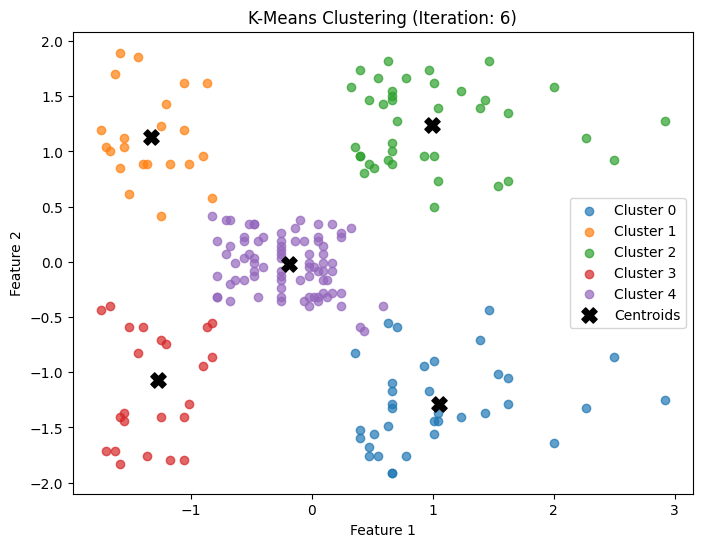

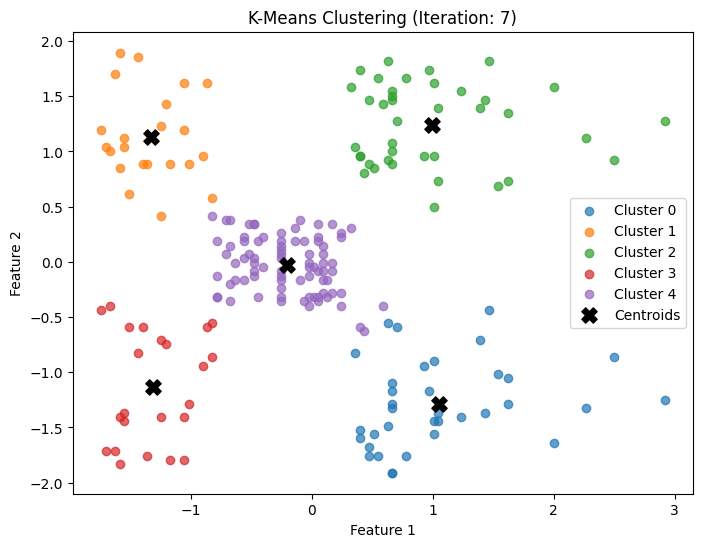

Farthest First converged in 8 iterations

### KMeans with Random Init - K=6 ###


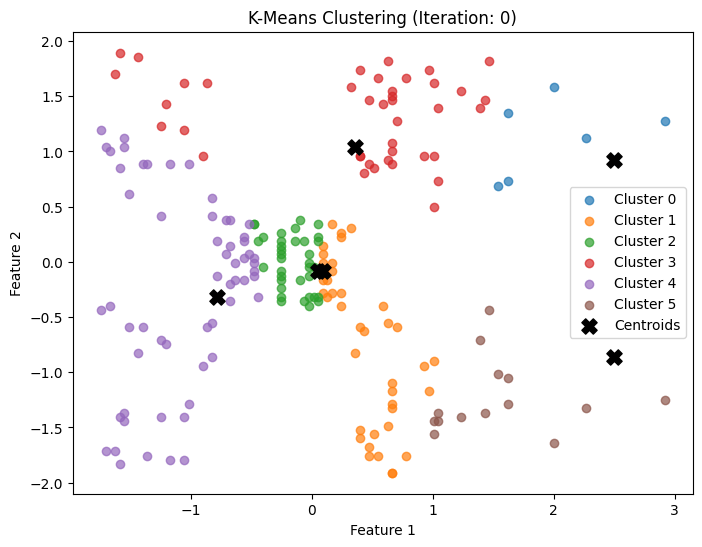

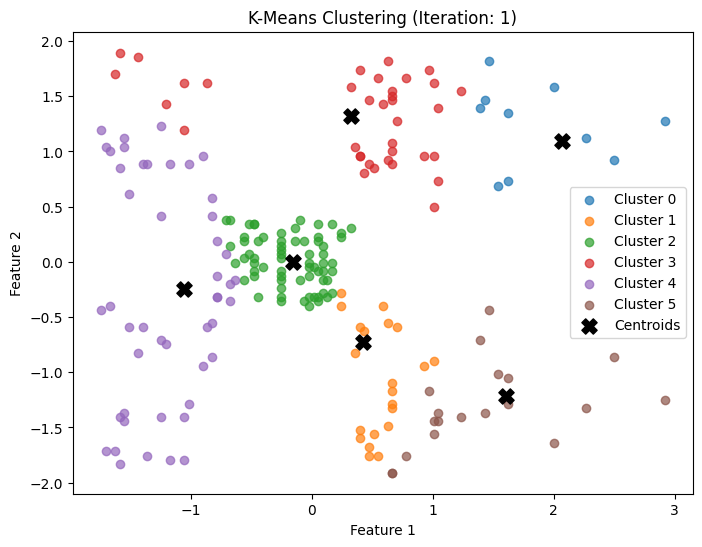

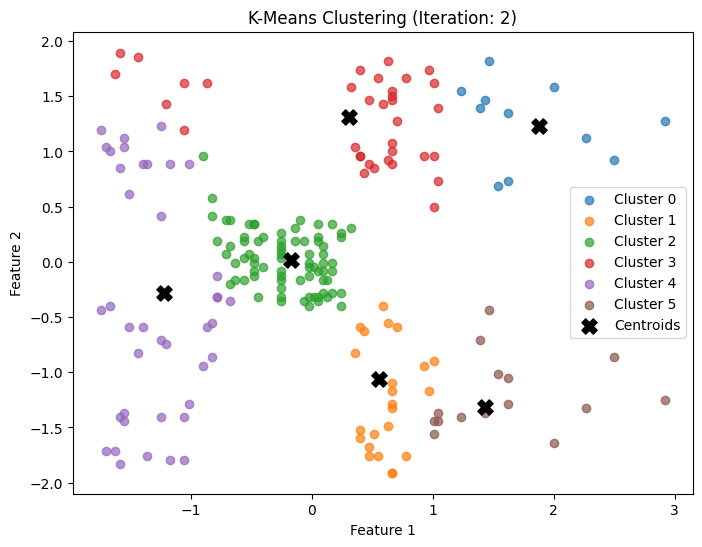

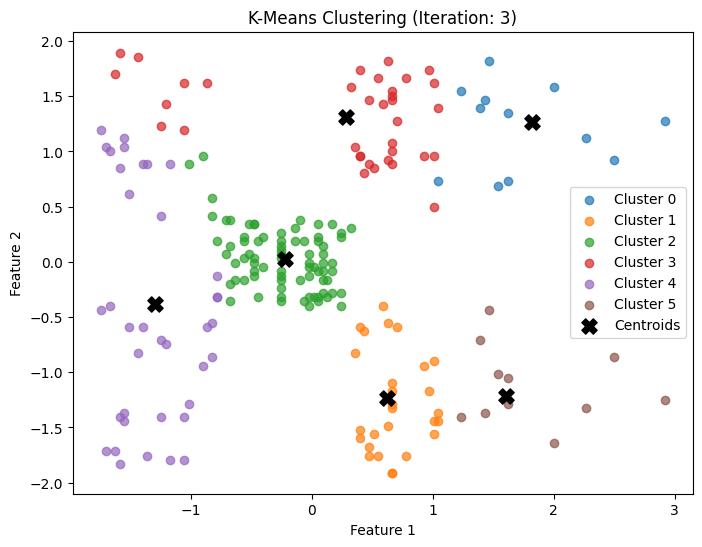

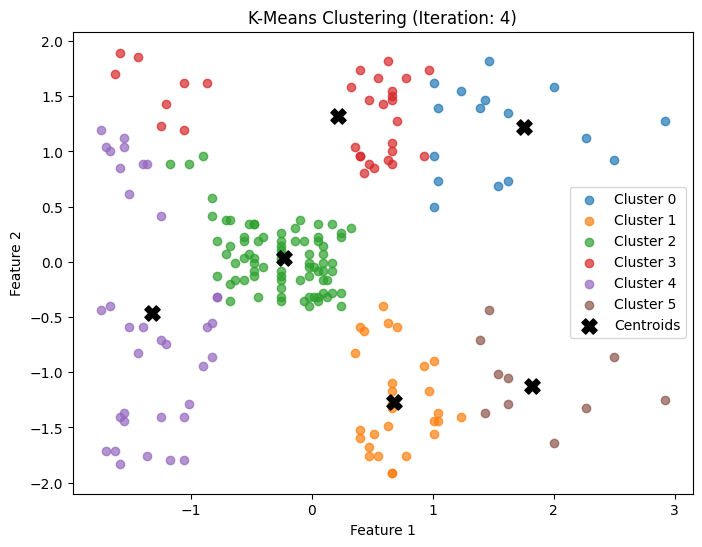

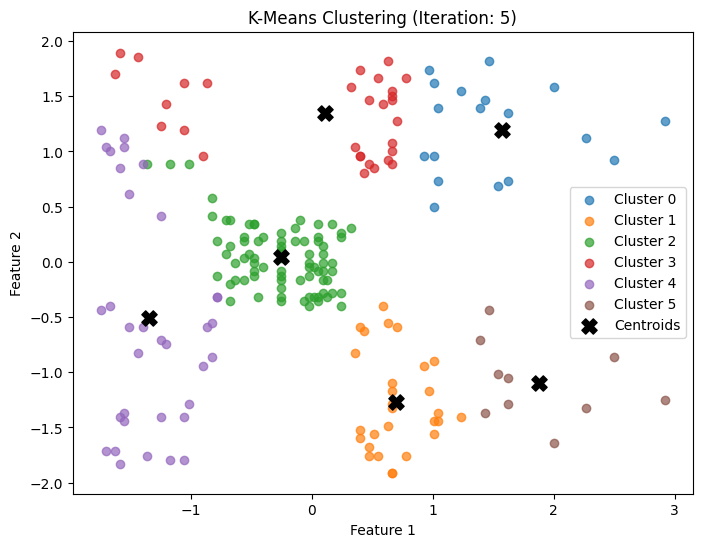

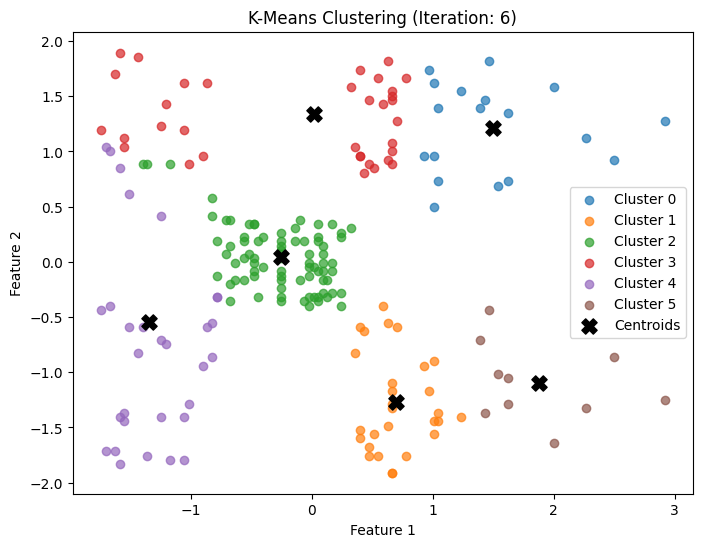

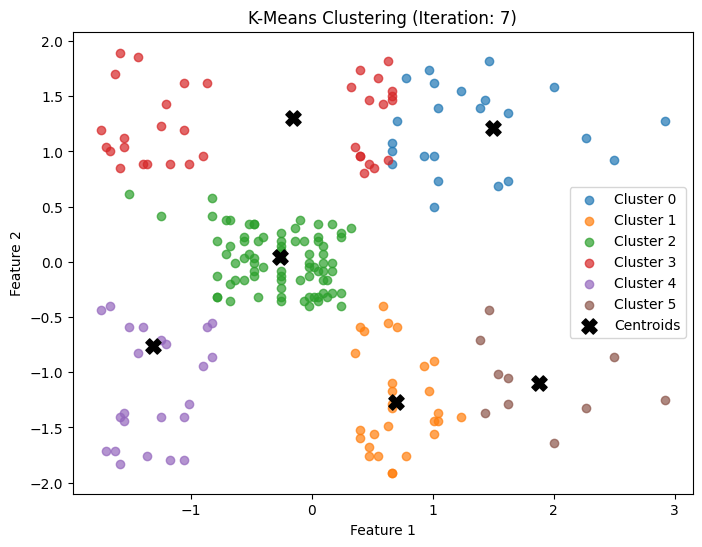

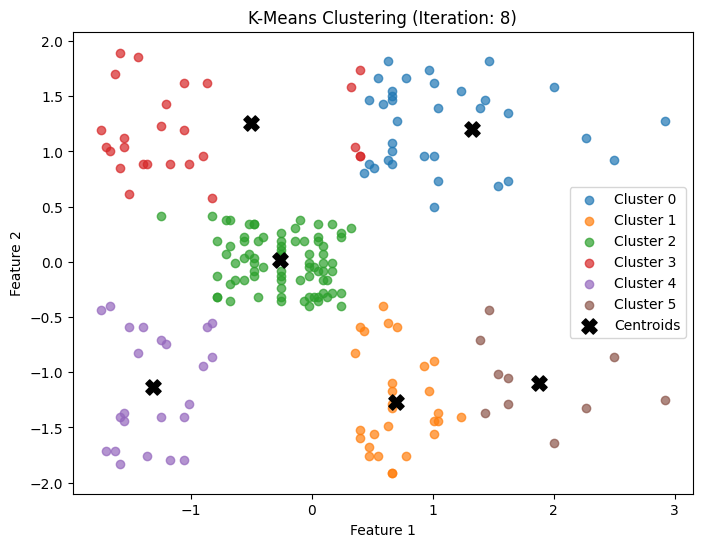

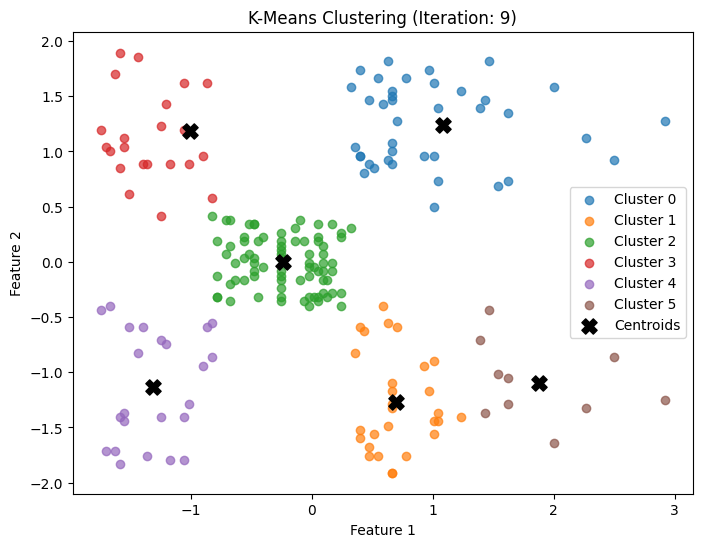

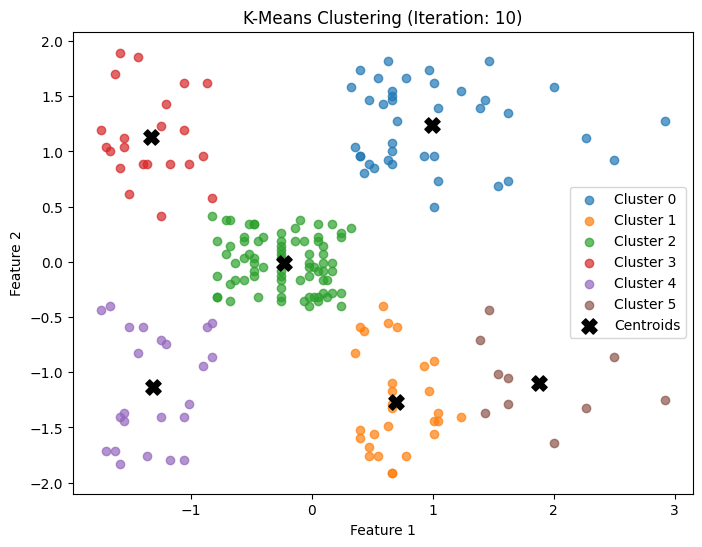

KMeans with Random converged in 11 iterations

### KMeans with KMeans++ Init - K=6 ###


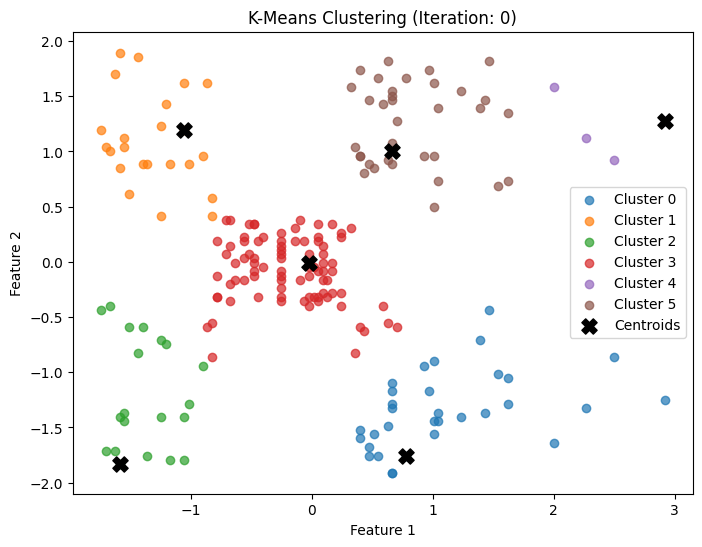

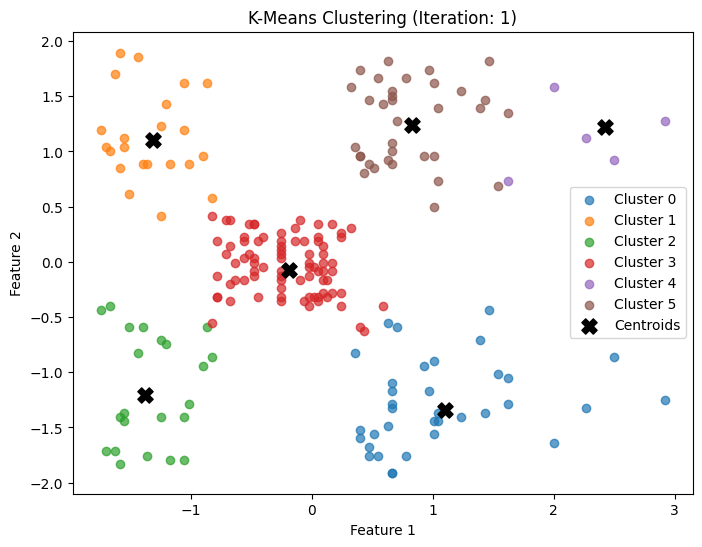

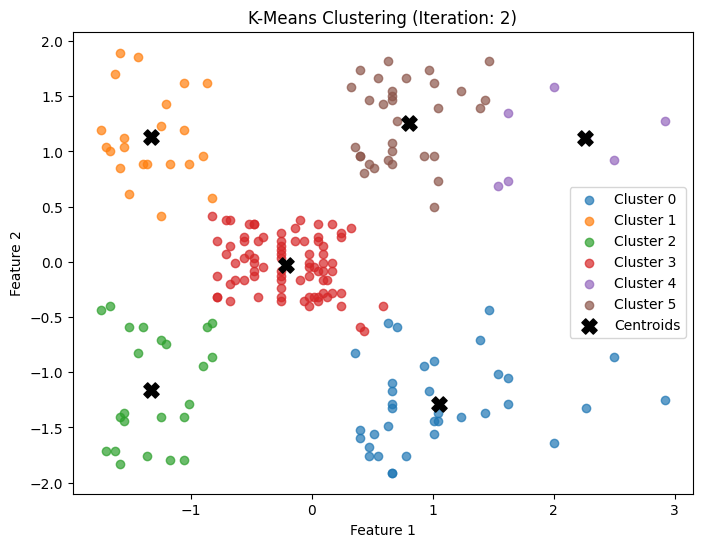

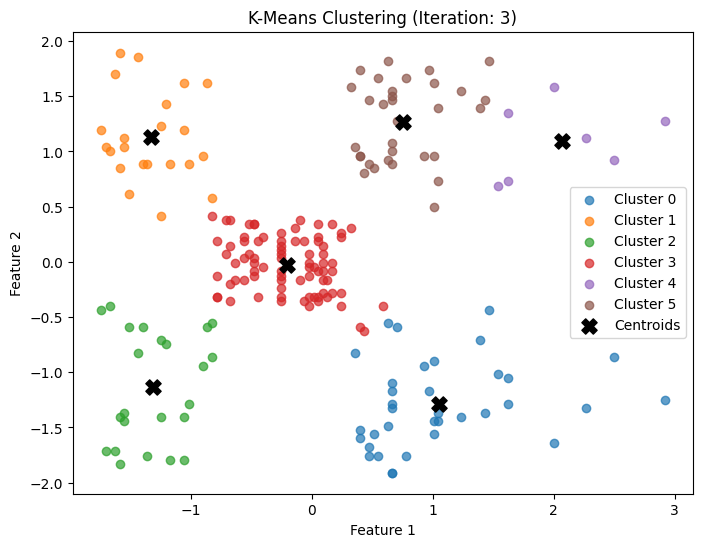

KMeans++ converged in 4 iterations

### KMeans with Farthest First Init - K=6 ###


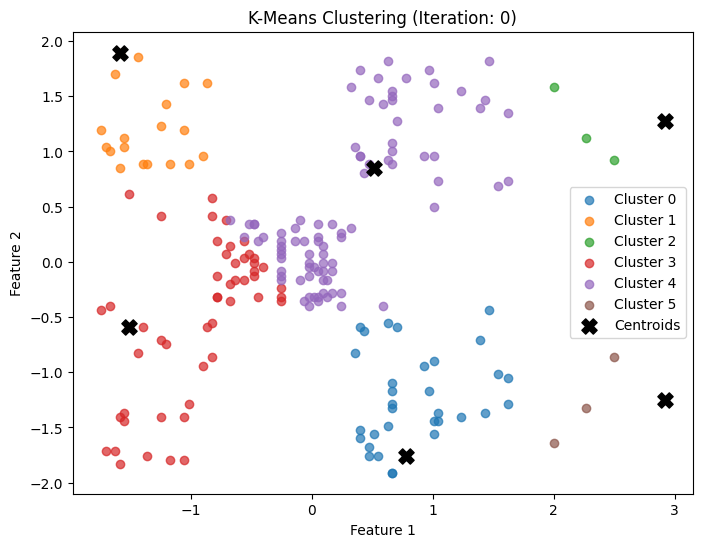

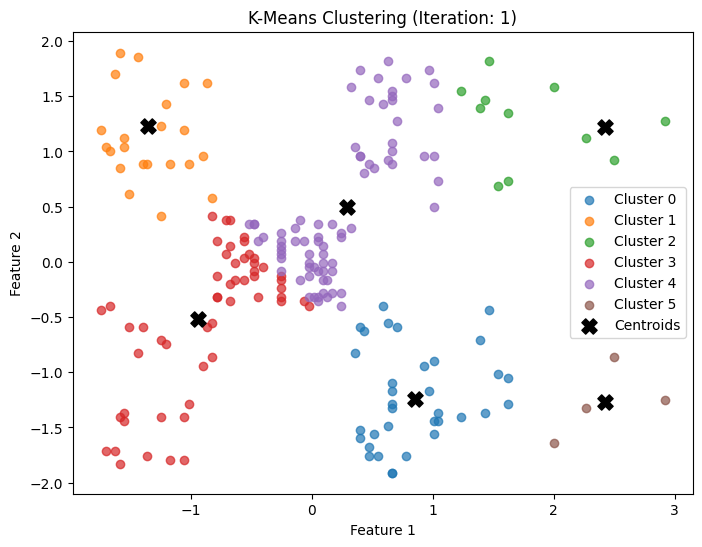

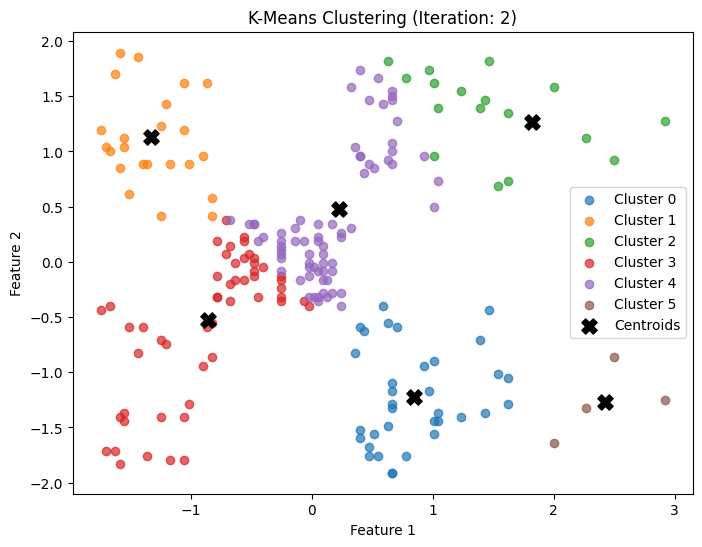

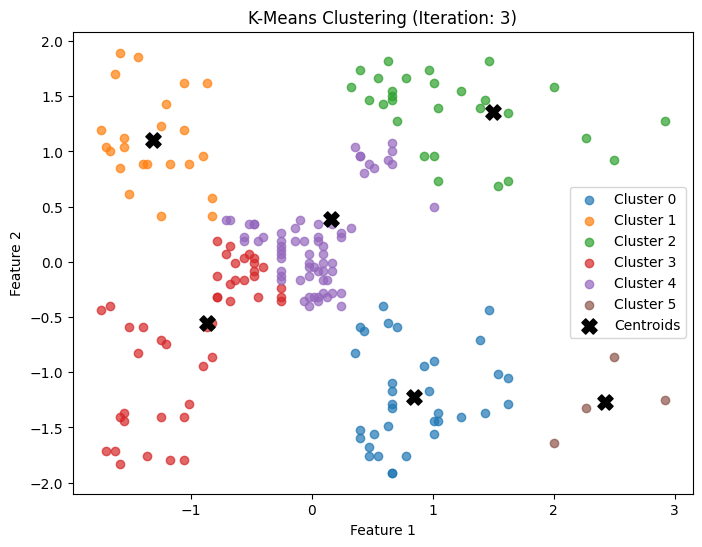

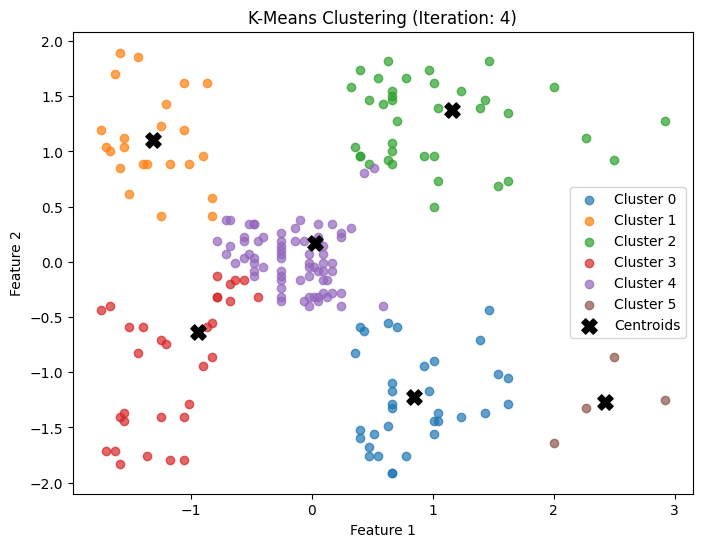

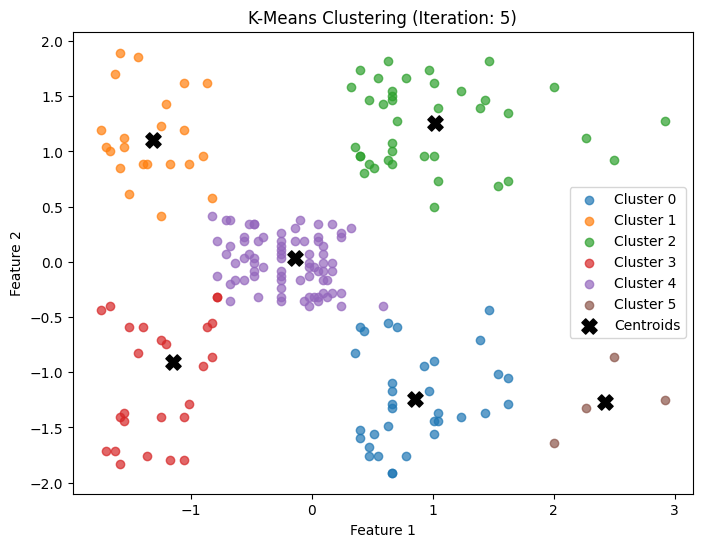

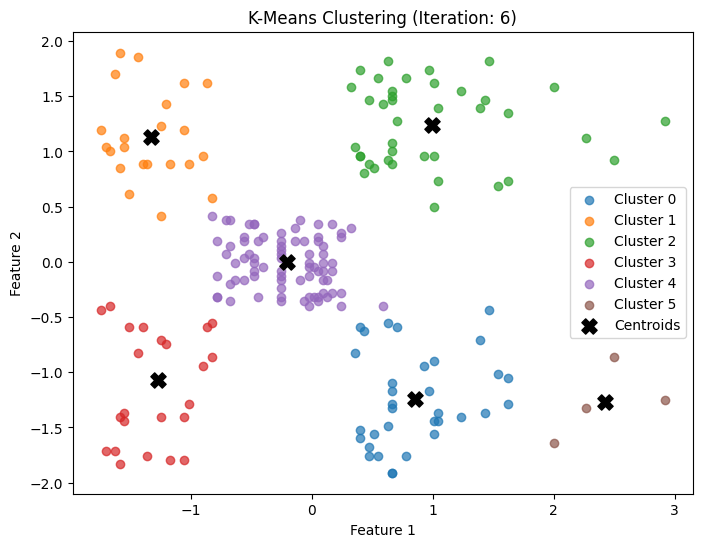

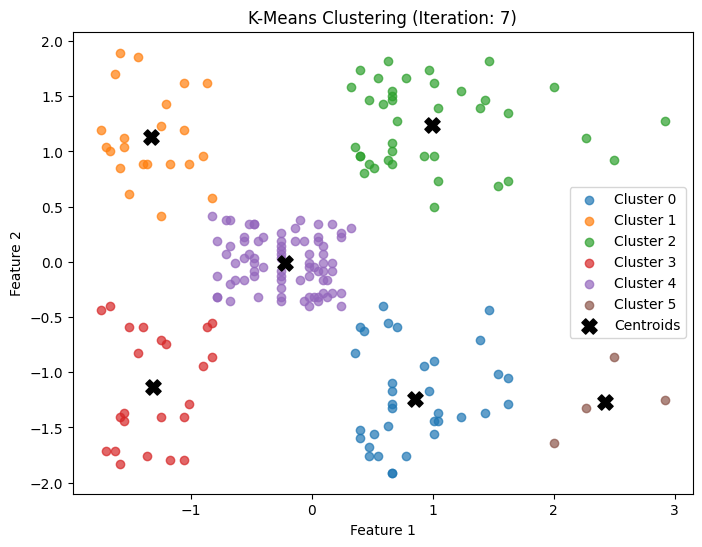

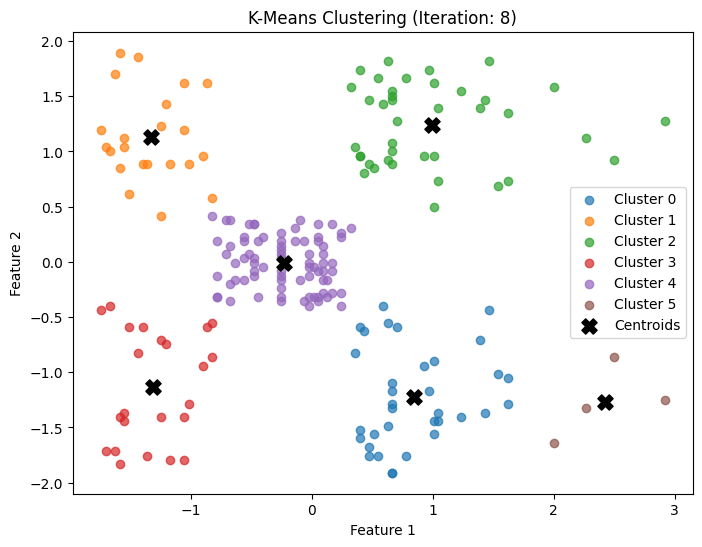

Farthest First converged in 9 iterations


In [31]:
# Determining Optimal K for Mall Customer Data
X = X_mall_scaled[:, 1:3] # Using only 'Annual_Income_k' and 'Spending_Score' for K-Means clustering

wcss_random = []
wcss_pp = []
wcss_ff = []

iters_random = []
iters_pp = []
iters_ff = []

k_range = range(2, 7)

# Elbow Method (WCSS) Comparison and Convergence Tracking
for i in k_range:
    # Random Initialization
    print(f"\n### KMeans with Random Init - K={i} ###")
    kmeans_random_elbow = KMeans(k=i, plot_during_fitting=True, random_seed=24)
    _, _, _, _, losses_r_elbow = kmeans_random_elbow.predict(X)
    wcss_random.append(losses_r_elbow[-1] if losses_r_elbow else np.inf)
    iters_random.append(len(losses_r_elbow))
    print(f"KMeans with Random converged in {len(losses_r_elbow)} iterations")

    # KMeans++ Initialization
    print(f"\n### KMeans with KMeans++ Init - K={i} ###")
    kmeans_pp_elbow = KMeansPlusPlus(k=i, plot_during_fitting=True, random_seed=24)
    _, _, _, _, losses_pp_elbow = kmeans_pp_elbow.predict(X)
    wcss_pp.append(losses_pp_elbow[-1] if losses_pp_elbow else np.inf)
    iters_pp.append(len(losses_pp_elbow))
    print(f"KMeans++ converged in {len(losses_pp_elbow)} iterations")

    # Farthest First Initialization
    print(f"\n### KMeans with Farthest First Init - K={i} ###")
    kmeans_ff_elbow = KMeansFarthestFirst(k=i, plot_during_fitting=True, random_seed=24)
    _, _, _, _, losses_ff_elbow = kmeans_ff_elbow.predict(X)
    wcss_ff.append(losses_ff_elbow[-1] if losses_ff_elbow else np.inf)
    iters_ff.append(len(losses_ff_elbow))
    print(f"Farthest First converged in {len(losses_ff_elbow)} iterations")


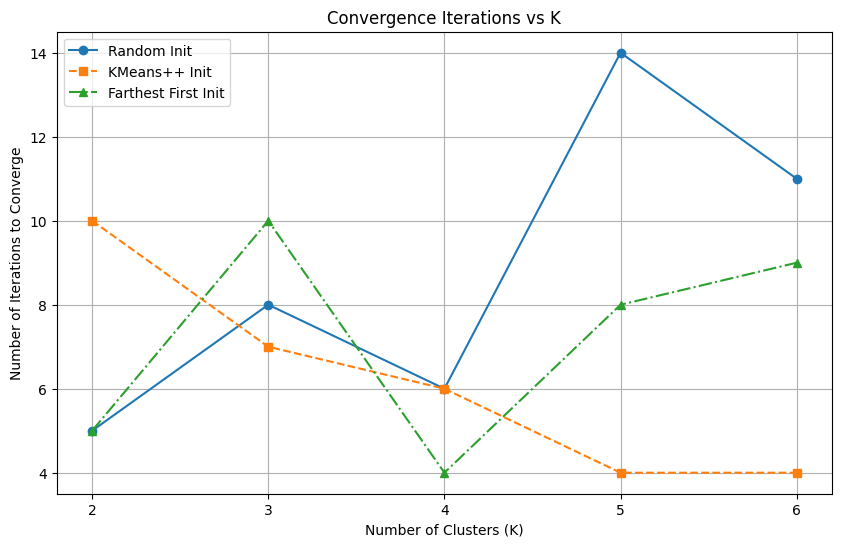

In [32]:
# Plot convergence iterations per K
plt.figure(figsize=(10, 6))
plt.plot(k_range, iters_random, marker='o', linestyle='-', label='Random Init')
plt.plot(k_range, iters_pp, marker='s', linestyle='--', label='KMeans++ Init')
plt.plot(k_range, iters_ff, marker='^', linestyle='-.', label='Farthest First Init')
plt.title('Convergence Iterations vs K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Number of Iterations to Converge')
plt.xticks(k_range)
plt.grid(True)
plt.legend()
plt.show()

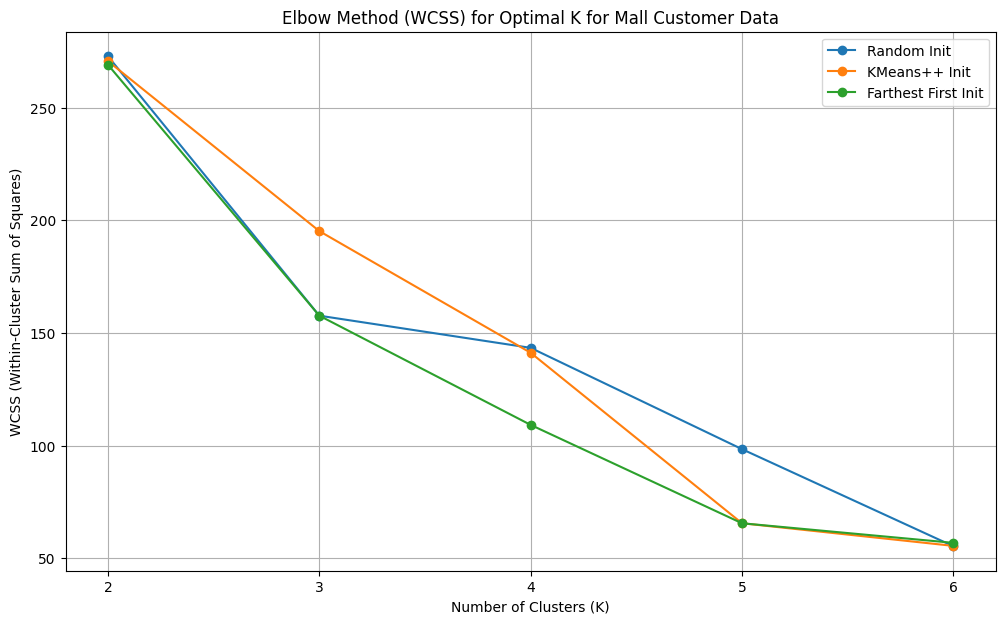

In [33]:
plt.figure(figsize=(12, 7))
plt.plot(k_range, wcss_random, marker='o', linestyle='-', label='Random Init')
plt.plot(k_range, wcss_pp, marker='o', linestyle='-', label='KMeans++ Init')
plt.plot(k_range, wcss_ff, marker='o', linestyle='-', label='Farthest First Init')
plt.title('Elbow Method (WCSS) for Optimal K for Mall Customer Data')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(k_range)
plt.grid(True)
plt.legend()
plt.show()

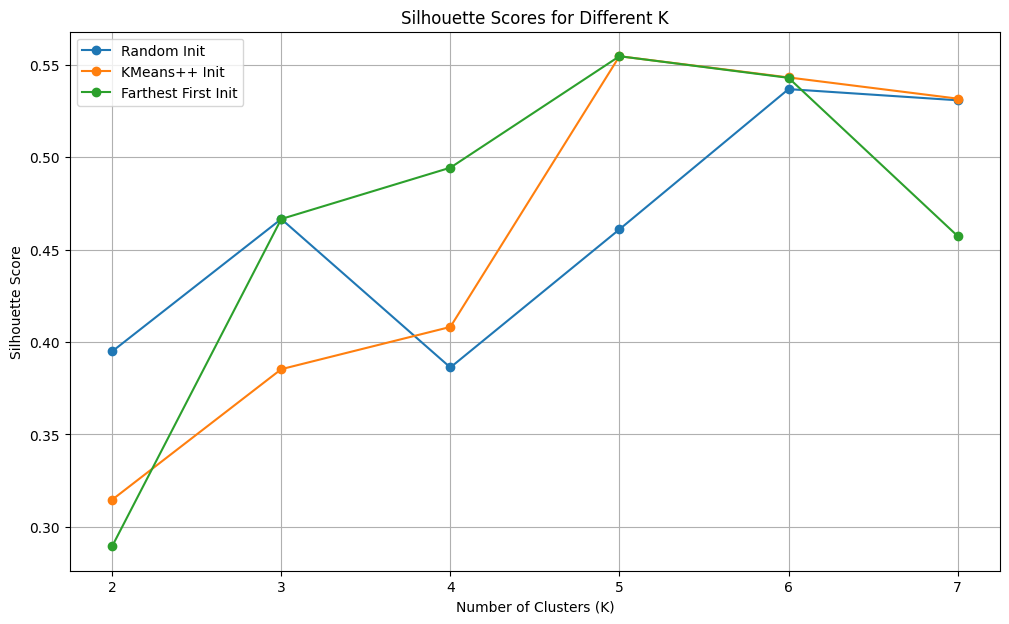

In [34]:
# Silhouette Score Comparison
silhouette_scores_random = []
silhouette_scores_pp = []
silhouette_scores_ff = []
k_range_silhouette = range(2, 8) # Silhouette score is not defined for K=1

for k_val in k_range_silhouette:
    # Random Initialization
    kmeans_random_sil = KMeans(k=k_val, random_seed=24)
    labels_random_sil, _, _, _, _ = kmeans_random_sil.predict(X)
    if len(np.unique(labels_random_sil)) > 1: # Ensure more than one cluster is formed
        score = silhouette_score(X, labels_random_sil)
        silhouette_scores_random.append(score)
    else:
        silhouette_scores_random.append(-1) # Placeholder for invalid score

    # K-Means++ Initialization
    kmeans_pp_sil = KMeansPlusPlus(k=k_val, random_seed=24)
    labels_pp_sil, _, _, _, _ = kmeans_pp_sil.predict(X)
    if len(np.unique(labels_pp_sil)) > 1:
        score = silhouette_score(X, labels_pp_sil)
        silhouette_scores_pp.append(score)
    else:
        silhouette_scores_pp.append(-1)

    # Farthest First Initialization
    kmeans_ff_sil = KMeansFarthestFirst(k=k_val, random_seed=24)
    labels_ff_sil, _, _, _, _ = kmeans_ff_sil.predict(X)
    if len(np.unique(labels_ff_sil)) > 1:
        score = silhouette_score(X, labels_ff_sil)
        silhouette_scores_ff.append(score)
    else:
        silhouette_scores_ff.append(-1)

plt.figure(figsize=(12, 7))
plt.plot(k_range_silhouette, silhouette_scores_random, marker='o', linestyle='-', label='Random Init')
plt.plot(k_range_silhouette, silhouette_scores_pp, marker='o', linestyle='-', label='KMeans++ Init')
plt.plot(k_range_silhouette, silhouette_scores_ff, marker='o', linestyle='-', label='Farthest First Init')
plt.title('Silhouette Scores for Different K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range_silhouette)
plt.grid(True)
plt.legend()
plt.show()

In [35]:
# Print the optimal K and max silhouette score for each initialization method
if any(s > -1 for s in silhouette_scores_random):
    optimal_k_random_sil = k_range_silhouette[np.argmax(silhouette_scores_random)]
    print(f"Random Init - Optimal K (by Silhouette): {optimal_k_random_sil}, Max Silhouette Score: {max(silhouette_scores_random):.4f}")
if any(s > -1 for s in silhouette_scores_pp):
    optimal_k_pp_sil = k_range_silhouette[np.argmax(silhouette_scores_pp)]
    print(f"KMeans++ Init - Optimal K (by Silhouette): {optimal_k_pp_sil}, Max Silhouette Score: {max(silhouette_scores_pp):.4f}")
if any(s > -1 for s in silhouette_scores_ff):
    optimal_k_ff_sil = k_range_silhouette[np.argmax(silhouette_scores_ff)]
    print(f"Farthest First Init - Optimal K (by Silhouette): {optimal_k_ff_sil}, Max Silhouette Score: {max(silhouette_scores_ff):.4f}")

# Choose the final K based on a combined assessment of Elbow and Silhouette plots.
chosen_k_mall = optimal_k_ff_sil
print(f"\nProceeding with K={chosen_k_mall} for final clustering based on optimal results.")

Random Init - Optimal K (by Silhouette): 6, Max Silhouette Score: 0.5369
KMeans++ Init - Optimal K (by Silhouette): 5, Max Silhouette Score: 0.5547
Farthest First Init - Optimal K (by Silhouette): 5, Max Silhouette Score: 0.5547

Proceeding with K=5 for final clustering based on optimal results.


## Using PCA for Dimensionality Reduction


Applying PCA...


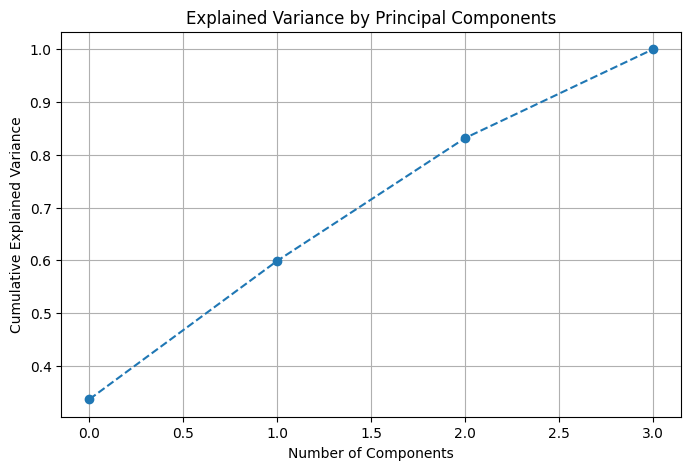

Data transformed to 2 Principal Components. Shape: (200, 2)
Total explained variance by 2 components: 0.60


In [36]:
# Applying PCA for dimensionality reduction
print("\nApplying PCA...")

# First, fit PCA with all components to understand explained variance.
pca_full = PCA(random_state=42)
pca_full.fit(X_mall_scaled)

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()


n_components = 2
pca = PCA(n_components=n_components, random_state=42)
X_mall_pca = pca.fit_transform(X_mall_scaled)
print(f"Data transformed to {n_components} Principal Components. Shape: {X_mall_pca.shape}")
print(f"Total explained variance by {n_components} components: {pca.explained_variance_ratio_.sum():.2f}")

In [ ]:
# Determining Optimal K for Mall Customer Data (on PCA-transformed data)

wcss_random = []
wcss_pp = []
wcss_ff = []

iters_random = []
iters_pp = []
iters_ff = []

k_range = range(2, 7)

# Elbow Method (WCSS) Comparison and Convergence Tracking
for i in k_range:
    # Random Initialization
    print(f"\n### KMeans with Random Init - K={i} ###")
    kmeans_random_elbow = KMeans(k=i, plot_during_fitting=True, random_seed=24)
    _, _, _, _, losses_r_elbow = kmeans_random_elbow.predict(X_mall_pca)
    wcss_random.append(losses_r_elbow[-1] if losses_r_elbow else np.inf)
    iters_random.append(len(losses_r_elbow))
    print(f"KMeans with Random converged in {len(losses_r_elbow)} iterations")

    # KMeans++ Initialization
    print(f"\n### KMeans with KMeans++ Init - K={i} ###")
    kmeans_pp_elbow = KMeansPlusPlus(k=i, plot_during_fitting=True, random_seed=24)
    _, _, _, _, losses_pp_elbow = kmeans_pp_elbow.predict(X_mall_pca)
    wcss_pp.append(losses_pp_elbow[-1] if losses_pp_elbow else np.inf)
    iters_pp.append(len(losses_pp_elbow))
    print(f"KMeans++ converged in {len(losses_pp_elbow)} iterations")

    # Farthest First Initialization
    print(f"\n### KMeans with Farthest First Init - K={i} ###")
    kmeans_ff_elbow = KMeansFarthestFirst(k=i, plot_during_fitting=True, random_seed=24)
    _, _, _, _, losses_ff_elbow = kmeans_ff_elbow.predict(X_mall_pca)
    wcss_ff.append(losses_ff_elbow[-1] if losses_ff_elbow else np.inf)
    iters_ff.append(len(losses_ff_elbow))
    print(f"Farthest First converged in {len(losses_ff_elbow)} iterations")


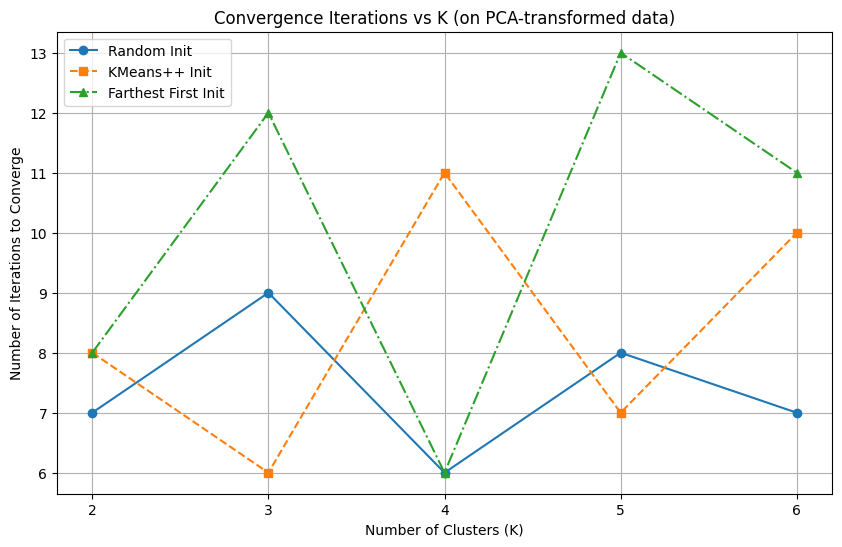

In [38]:
# Plot convergence iterations per K
plt.figure(figsize=(10, 6))
plt.plot(k_range, iters_random, marker='o', linestyle='-', label='Random Init')
plt.plot(k_range, iters_pp, marker='s', linestyle='--', label='KMeans++ Init')
plt.plot(k_range, iters_ff, marker='^', linestyle='-.', label='Farthest First Init')
plt.title('Convergence Iterations vs K (on PCA-transformed data)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Number of Iterations to Converge')
plt.xticks(k_range)
plt.grid(True)
plt.legend()
plt.show()

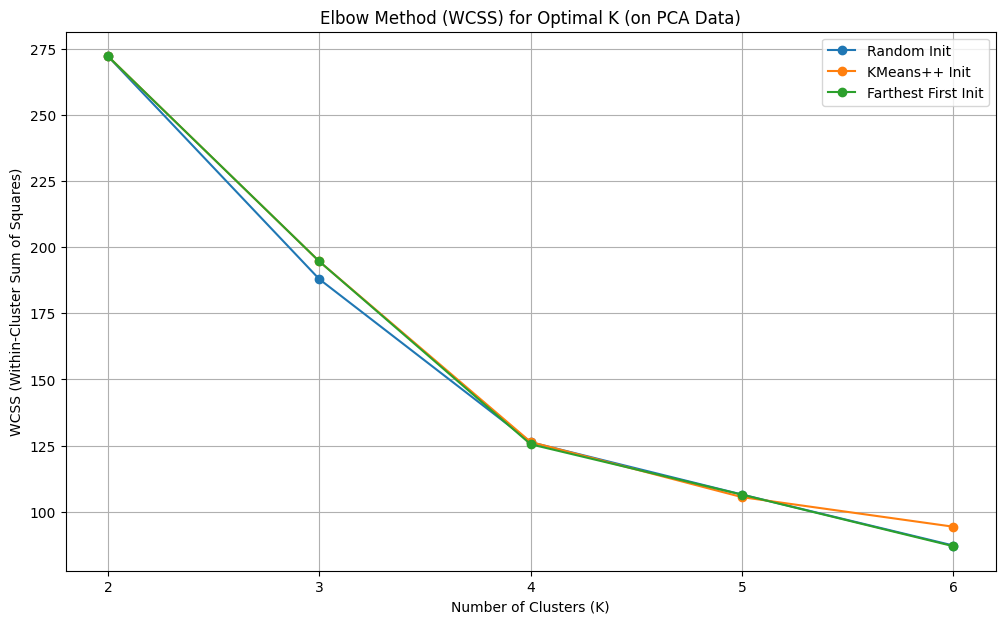

In [39]:
plt.figure(figsize=(12, 7))
plt.plot(k_range, wcss_random, marker='o', linestyle='-', label='Random Init')
plt.plot(k_range, wcss_pp, marker='o', linestyle='-', label='KMeans++ Init')
plt.plot(k_range, wcss_ff, marker='o', linestyle='-', label='Farthest First Init')
plt.title('Elbow Method (WCSS) for Optimal K (on PCA Data)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(k_range)
plt.grid(True)
plt.legend()
plt.show()

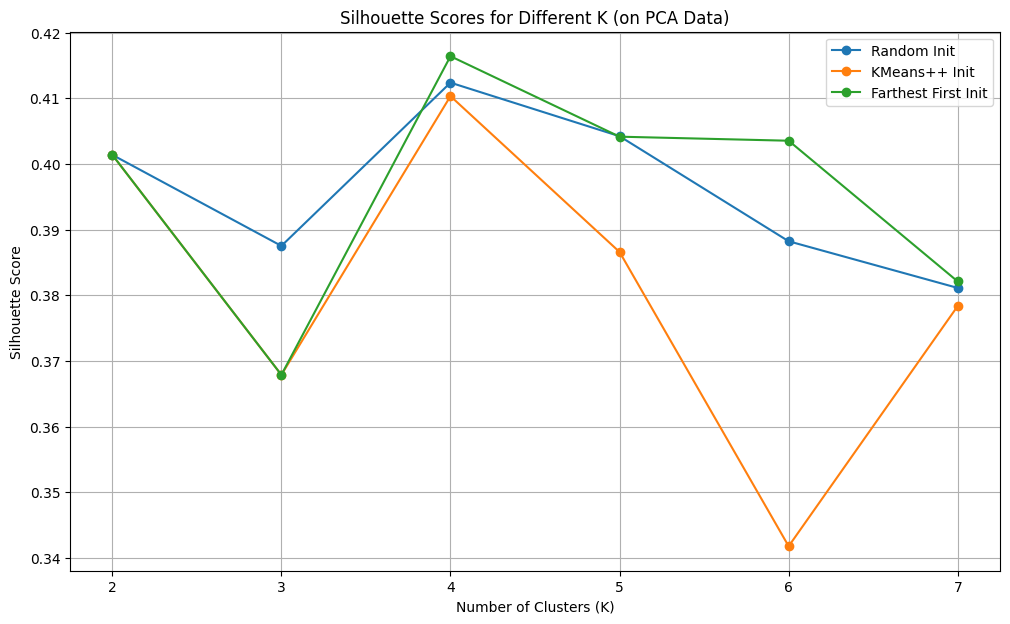

In [40]:
# Silhouette Score Comparison
silhouette_scores_random = []
silhouette_scores_pp = []
silhouette_scores_ff = []
k_range_silhouette = range(2, 8) # Silhouette score is not defined for K=1

for k_val in k_range_silhouette:
    # Random Initialization
    kmeans_random_sil = KMeans(k=k_val, random_seed=24)
    labels_random_sil, _, _, _, _ = kmeans_random_sil.predict(X_mall_pca)
    if len(np.unique(labels_random_sil)) > 1: # Ensure more than one cluster is formed
        score = silhouette_score(X_mall_pca, labels_random_sil)
        silhouette_scores_random.append(score)
    else:
        silhouette_scores_random.append(-1) # Placeholder for invalid score

    # K-Means++ Initialization
    kmeans_pp_sil = KMeansPlusPlus(k=k_val, random_seed=24)
    labels_pp_sil, _, _, _, _ = kmeans_pp_sil.predict(X_mall_pca)
    if len(np.unique(labels_pp_sil)) > 1:
        score = silhouette_score(X_mall_pca, labels_pp_sil)
        silhouette_scores_pp.append(score)
    else:
        silhouette_scores_pp.append(-1)

    # Farthest First Initialization
    kmeans_ff_sil = KMeansFarthestFirst(k=k_val, random_seed=24)
    labels_ff_sil, _, _, _, _ = kmeans_ff_sil.predict(X_mall_pca)
    if len(np.unique(labels_ff_sil)) > 1:
        score = silhouette_score(X_mall_pca, labels_ff_sil)
        silhouette_scores_ff.append(score)
    else:
        silhouette_scores_ff.append(-1)

plt.figure(figsize=(12, 7))
plt.plot(k_range_silhouette, silhouette_scores_random, marker='o', linestyle='-', label='Random Init')
plt.plot(k_range_silhouette, silhouette_scores_pp, marker='o', linestyle='-', label='KMeans++ Init')
plt.plot(k_range_silhouette, silhouette_scores_ff, marker='o', linestyle='-', label='Farthest First Init')
plt.title('Silhouette Scores for Different K (on PCA Data)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range_silhouette)
plt.grid(True)
plt.legend()
plt.show()

In [41]:
# Print the optimal K and max silhouette score for each initialization method
if any(s > -1 for s in silhouette_scores_random):
    optimal_k_random_sil = k_range_silhouette[np.argmax(silhouette_scores_random)]
    print(f"Random Init - Optimal K (by Silhouette): {optimal_k_random_sil}, Max Silhouette Score: {max(silhouette_scores_random):.4f}")
if any(s > -1 for s in silhouette_scores_pp):
    optimal_k_pp_sil = k_range_silhouette[np.argmax(silhouette_scores_pp)]
    print(f"KMeans++ Init - Optimal K (by Silhouette): {optimal_k_pp_sil}, Max Silhouette Score: {max(silhouette_scores_pp):.4f}")
if any(s > -1 for s in silhouette_scores_ff):
    optimal_k_ff_sil = k_range_silhouette[np.argmax(silhouette_scores_ff)]
    print(f"Farthest First Init - Optimal K (by Silhouette): {optimal_k_ff_sil}, Max Silhouette Score: {max(silhouette_scores_ff):.4f}")

# Choose the final K based on a combined assessment of Elbow and Silhouette plots.
chosen_k_mall = optimal_k_ff_sil
print(f"\nProceeding with K={chosen_k_mall} for final clustering based on optimal results.")

Random Init - Optimal K (by Silhouette): 4, Max Silhouette Score: 0.4124
KMeans++ Init - Optimal K (by Silhouette): 4, Max Silhouette Score: 0.4103
Farthest First Init - Optimal K (by Silhouette): 4, Max Silhouette Score: 0.4164

Proceeding with K=4 for final clustering based on optimal results.


Clustering complete. Final WCSS: 126.37 after 11 iterations.

##### Visualizing Customer Segments in PCA Space #####


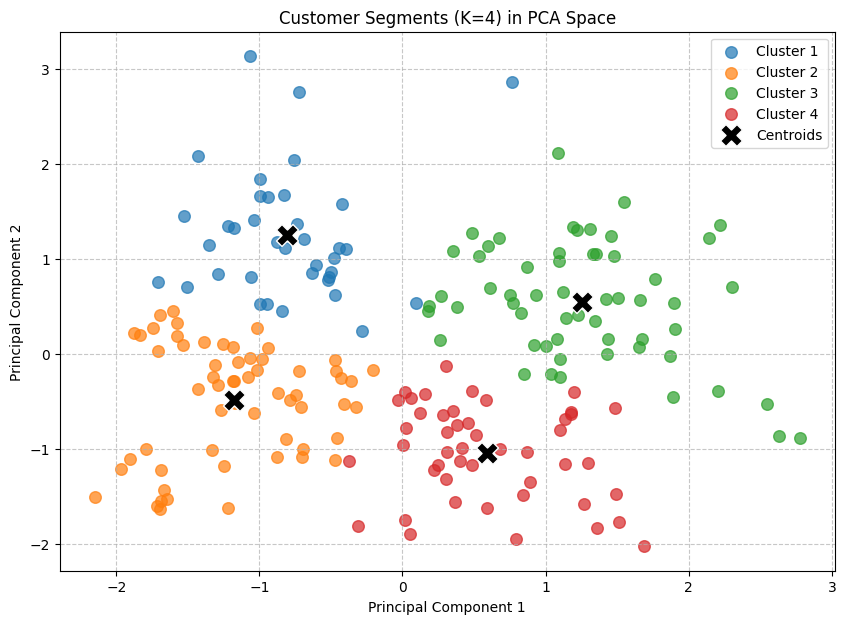

In [42]:
# Applying Final K-Means Clustering with K={chosen_k_mall}

# Apply K-MeansPlusPlus with the chosen K for its robustness
mall_kmeans_model = KMeansPlusPlus(k=chosen_k_mall, random_seed=24, plot_during_fitting=False)
# Perform clustering on the PCA-transformed data
mall_labels, mall_centroids_pca, mall_clusters, _, mall_losses = mall_kmeans_model.predict(X_mall_pca)

print(f"Clustering complete. Final WCSS: {mall_losses[-1]:.2f} after {len(mall_losses)} iterations.")


print("\n##### Visualizing Customer Segments in PCA Space #####")
if n_components >= 2:
    plt.figure(figsize=(10, 7))
    colors_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                      '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

    for i in range(chosen_k_mall):
        cluster_points_pca = X_mall_pca[mall_labels == i]
        plt.scatter(cluster_points_pca[:, 0], cluster_points_pca[:, 1],
                    s=70, c=[colors_palette[i % len(colors_palette)]], label=f'Cluster {i+1}', alpha=0.7)

    # Plot the centroids in PCA space
    plt.scatter(mall_centroids_pca[:, 0], mall_centroids_pca[:, 1],
                s=250, marker='X', c='black', label='Centroids', edgecolor='white', zorder=5)
    plt.title(f'Customer Segments (K={chosen_k_mall}) in PCA Space')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
else:
    print(f"Cannot visualize clusters in 2D PCA space as only {n_components} component(s) were selected.")

In [ ]:
iterations = {}
for method, model in {'Random': KMeans, 'KMeans++': KMeansPlusPlus, 'FarthestFirst': KMeansFarthestFirst}.items():
    iters = []
    for seed in [1, 3, 8, 9, 10, 12, 15, 20, 24, 29]:
        kmeans = model(k=chosen_k_mall, random_seed=seed)
        _, _, _, _, losses = kmeans.predict(X_mall_pca)
        print(f"Running {method} with seed {seed}. Converged after {kmeans.convergence_iteration} iterations!")
        iters.append(len(losses))
    iterations[method] = np.mean(iters)

Running Random with seed 1. Converged after 19 iterations.
Running Random with seed 3. Converged after 6 iterations.
Running Random with seed 8. Converged after 10 iterations.
Running Random with seed 9. Converged after 17 iterations.
Running Random with seed 10. Converged after 7 iterations.
Running Random with seed 12. Converged after 18 iterations.
Running Random with seed 15. Converged after 13 iterations.
Running Random with seed 20. Converged after 12 iterations.
Running Random with seed 24. Converged after 6 iterations.
Running Random with seed 29. Converged after 9 iterations.
Running KMeans++ with seed 1. Converged after 7 iterations.
Running KMeans++ with seed 3. Converged after 9 iterations.
Running KMeans++ with seed 8. Converged after 10 iterations.
Running KMeans++ with seed 9. Converged after 5 iterations.
Running KMeans++ with seed 10. Converged after 8 iterations.
Running KMeans++ with seed 12. Converged after 11 iterations.
Running KMeans++ with seed 15. Converged aft